In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.svm import SVR, SVC
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBClassifier
from patsy import dmatrices

In [14]:
df = pd.read_csv("C:/Users/39348/Downloads/data/df_dataset.csv")
df_workday = pd.read_csv("C:/Users/39348/Downloads/data/df_workday_dataset.csv")
df_holiday = pd.read_csv("C:/Users/39348/Downloads/data/df_holiday_dataset.csv")

In [15]:
len(df)

43380

In [16]:
df.id.nunique()

98

In [17]:
# Define the feature matrix (X) and the target variable (y)
X = df.drop(columns=['mood_change'])
y = df['mood_change']

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create modified versions of the training and test sets for linear regression
X_train_linear = X_train.copy()
X_test_linear = X_test.copy()

variables_to_remove = [
    'what2_Cooking', 'withw2_Alone', 'where2_HomeApartment/room', 'day_type_Holiday', 
    'day_of_week_Monday', 'gender_Female', 'nationality_Italian', 
    'department_Business/economics', 'cohort_17-18', 'degree_BSc', 
    'residence_Trento', 'time_07:00:00'
]

# Remove the specified variables from X_train_linear
X_train_linear = X_train_linear.drop(columns=variables_to_remove, errors='ignore')
X_test_linear = X_test_linear.drop(columns=variables_to_remove, errors='ignore')

In [18]:
print(len(X_train))
print(len(X_test))

30366
13014


In [19]:
features1 = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Pconformity', 'Ptradition', 'Pbenov', 'Punivers', 'Pself', 'Pstim',
       'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen', 'Pselfenh',
       'Pselftran', 'Pconserv', 'Pexcitements', 'Psuprapersonal',
       'Pinteractive', 'Ppromotion', 'Pexistence', 'Pnormative', 'Linguistic',
       'Logicmath', 'Spatial', 'Bodykines', 'Musical', 'Interpersonal',
       'Intrapersonal', 'Environmental', 'Spiritual']

features2 = ['gender_Female', 'gender_Male', 'nationality_Italian', 'nationality_Foreign', 'department_Business/economics', 
            'department_Engineering and Applied Sciences', 'department_Humanities', 'department_International Relations and Public Administration', 
            'department_Law', 'department_Medicine and veterinary medicine', 'department_Natural Sciences', 'department_Social Sciences', 
            'cohort_17-18', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22', 'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27-30', 
            'cohort_31+', 'degree_BSc', 'degree_MSc', 'residence_Close to the university', 
            'residence_Far from the university', 'residence_Rovereto', 'residence_Trento']

features2_linear = ['gender_Male', 'nationality_Foreign', 
       'department_Engineering and Applied Sciences', 'department_Humanities', 
       'department_Law', 'department_Medicine and veterinary medicine', 
       'department_Natural Sciences', 'department_Social Sciences', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22', 'cohort_23', 
       'cohort_24', 'cohort_25-26', 'cohort_27-30', 'cohort_31+', 'degree_MSc', 
       'residence_Close to the university', 'residence_Far from the university', 'residence_Rovereto']

features3 = ['day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 
            'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
            'time_07:00:00', 'time_07:30:00', 'time_08:00:00', 'time_08:30:00', 'time_09:00:00', 'time_09:30:00', 'time_10:00:00', 
            'time_10:30:00', 'time_11:00:00', 'time_11:30:00', 'time_12:00:00', 'time_12:30:00', 'time_13:00:00', 'time_13:30:00', 
            'time_14:00:00', 'time_14:30:00', 'time_15:00:00', 'time_15:30:00', 'time_16:00:00', 'time_16:30:00', 'time_17:00:00', 
            'time_17:30:00', 'time_18:00:00', 'time_18:30:00', 'time_19:00:00', 'time_19:30:00', 'time_20:00:00', 'time_20:30:00', 
            'time_21:00:00', 'time_21:30:00', 'time_22:00:00', 'time_22:30:00', 'time_23:00:00', 'time_23:30:00', 'time_00:00:00', 
            'time_00:30:00', 'time_01:00:00', 'time_01:30:00', 'time_02:00:00']

features3_linear = ['day_of_week_Friday', 
            'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
            'time_07:30:00', 'time_08:00:00', 'time_08:30:00', 'time_09:00:00', 'time_09:30:00', 'time_10:00:00', 'time_10:30:00', 
            'time_11:00:00', 'time_11:30:00', 'time_12:00:00', 'time_12:30:00', 'time_13:00:00', 'time_13:30:00', 'time_14:00:00', 
            'time_14:30:00', 'time_15:00:00', 'time_15:30:00', 'time_16:00:00', 'time_16:30:00', 'time_17:00:00', 'time_17:30:00', 
            'time_18:00:00', 'time_18:30:00', 'time_19:00:00', 'time_19:30:00', 'time_20:00:00', 'time_20:30:00', 'time_21:00:00', 
            'time_21:30:00', 'time_22:00:00', 'time_22:30:00', 'time_23:00:00', 'time_23:30:00', 'time_00:00:00', 'time_00:30:00', 
            'time_01:00:00', 'time_01:30:00', 'time_02:00:00']

features4 = ['what2_Cooking', 'what2_DistantCommunication/SeekingInternet', 'what2_Eating', 'what2_Householdcare/Shopping', 'what2_Lecture', 
            'what2_Leisure', 'what2_Listeningmusic/Reading', 'what2_Social media', 'what2_Sociallife/Happy Hour', 'what2_Study/workgroup', 
            'what2_Travel', 'what2_Watching/TV/YouTube', 'what2_Work/Other', 'withw2_Alone', 'withw2_Classmates', 'withw2_Colleagues/Other', 
            'withw2_Friends', 'withw2_Partner', 'withw2_Relatives', 'withw2_Roommates', 'where2_AnotherIndoor', 
            'where2_AnotherOutdoor', 'where2_Classroom/Uni_Library', 'where2_HomeApartment/room', 'where2_House/friends/others', 
            'where2_RelativesHome']

features4_linear = ['what2_DistantCommunication/SeekingInternet', 'what2_Eating', 'what2_Householdcare/Shopping', 'what2_Lecture', 'what2_Leisure', 
            'what2_Listeningmusic/Reading', 'what2_Social media', 'what2_Sociallife/Happy Hour', 'what2_Study/workgroup', 'what2_Travel', 
            'what2_Watching/TV/YouTube', 'what2_Work/Other', 'withw2_Classmates', 'withw2_Colleagues/Other', 'withw2_Friends', 'withw2_Partner',
            'withw2_Relatives', 'withw2_Roommates', 'where2_AnotherIndoor', 'where2_AnotherOutdoor', 
            'where2_Classroom/Uni_Library', 'where2_House/friends/others', 'where2_RelativesHome']

features5 = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness', 'Pconformity', 'Ptradition', 'Pbenov', 
            'Punivers', 'Pself', 'Pstim', 'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen', 'Pselfenh', 'Pselftran', 'Pconserv', 
            'Pexcitements', 'Psuprapersonal', 'Pinteractive', 'Ppromotion', 'Pexistence', 'Pnormative', 'Linguistic', 'Logicmath', 'Spatial', 
            'Bodykines', 'Musical', 'Interpersonal', 'Intrapersonal', 'Environmental', 'Spiritual',
            'what2_Cooking', 'what2_DistantCommunication/SeekingInternet', 'what2_Eating', 'what2_Householdcare/Shopping', 'what2_Lecture', 
            'what2_Leisure', 'what2_Listeningmusic/Reading', 'what2_Social media', 'what2_Sociallife/Happy Hour', 'what2_Study/workgroup', 
            'what2_Travel', 'what2_Watching/TV/YouTube', 'what2_Work/Other', 'withw2_Alone', 'withw2_Classmates', 'withw2_Colleagues/Other', 
            'withw2_Friends', 'withw2_Partner', 'withw2_Relatives', 'withw2_Roommates', 'where2_AnotherIndoor', 
            'where2_AnotherOutdoor', 'where2_Classroom/Uni_Library', 'where2_HomeApartment/room', 'where2_House/friends/others', 
            'where2_RelativesHome', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Saturday', 
            'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 
            'gender_Female', 'gender_Male', 'nationality_Italian', 'nationality_Foreign', 'department_Business/economics', 
            'department_Engineering and Applied Sciences', 'department_Humanities', 'department_International Relations and Public Administration', 
            'department_Law', 'department_Medicine and veterinary medicine', 'department_Natural Sciences', 'department_Social Sciences', 
            'cohort_17-18', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22', 'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27-30', 
            'cohort_31+', 'degree_BSc', 'degree_MSc', 'residence_Close to the university', 'residence_Far from the university', 
            'residence_Rovereto', 'residence_Trento',
            'time_07:00:00', 'time_07:30:00', 'time_08:00:00', 'time_08:30:00', 'time_09:00:00', 'time_09:30:00', 'time_10:00:00', 
            'time_10:30:00', 'time_11:00:00', 'time_11:30:00', 'time_12:00:00', 'time_12:30:00', 'time_13:00:00', 'time_13:30:00', 
            'time_14:00:00', 'time_14:30:00', 'time_15:00:00', 'time_15:30:00', 'time_16:00:00', 'time_16:30:00', 'time_17:00:00', 
            'time_17:30:00', 'time_18:00:00', 'time_18:30:00', 'time_19:00:00', 'time_19:30:00', 'time_20:00:00', 'time_20:30:00', 
            'time_21:00:00', 'time_21:30:00', 'time_22:00:00', 'time_22:30:00', 'time_23:00:00', 'time_23:30:00', 'time_00:00:00', 
            'time_00:30:00', 'time_01:00:00', 'time_01:30:00', 'time_02:00:00']

c:\Users\39348\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    Decrease       0.10      0.28      0.14      1189
    Increase       0.11      0.28      0.15      1148
   No Change       0.86      0.53      0.65     10677

    accuracy                           0.48     13014
   macro avg       0.35      0.36      0.32     13014
weighted avg       0.72      0.48      0.56     13014



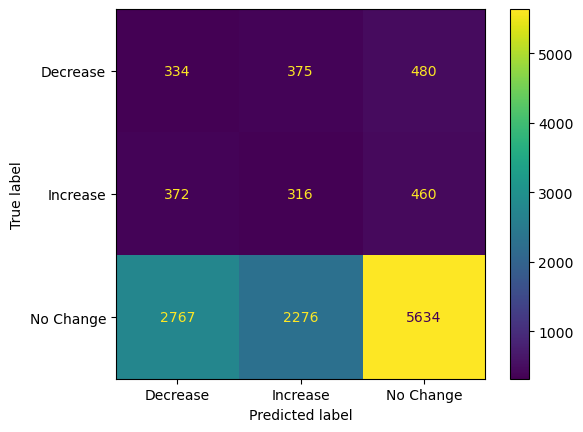

In [8]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features1]
X_test_features = X_test_linear[features1]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

In [19]:
# Get the coefficients for each class
coefficients = model.coef_

# Get the intercepts for each class
intercepts = model.intercept_

# Create a DataFrame to display coefficients for each class
coef_df = pd.DataFrame(coefficients, columns=X_train_features.columns)
coef_df['Intercept'] = intercepts

# Add class names as rows (optional, if y_train is encoded)
coef_df['Class'] = model.classes_

# Rearrange columns to place 'Class' first
coef_df = coef_df[['Class'] + [col for col in coef_df.columns if col != 'Class']]

# Display the coefficients
pd.set_option('display.max_columns', None)
coef_df

,Class,const,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Pconformity,Ptradition,Pbenov,Punivers,Pself,Pstim,Phedon,Pachieve,Ppower,Psecurity,Popen,Pselfenh,Pselftran,Pconserv,Pexcitements,Psuprapersonal,Pinteractive,Ppromotion,Pexistence,Pnormative,Linguistic,Logicmath,Spatial,Bodykines,Musical,Interpersonal,Intrapersonal,Environmental,Spiritual,Intercept
0,Decrease,-0.005861,0.000697,0.002703,-0.001863,0.000351,-0.003962,0.015209,-0.007886,-0.017353,-0.000734,-0.006865,0.013401,0.006725,0.028625,-0.009296,0.007442,0.003268,0.008685,-0.009044,0.004922,-0.027967,0.013124,-0.015536,0.007358,-0.034537,0.034678,0.001351,0.000662,0.000125,-0.002313,-0.000089,0.000974,-0.003405,0.003169,0.001394,-0.005861
1,Increase,-0.008652,0.000264,0.001718,-0.000409,-0.000628,-0.003194,0.019827,0.014454,-0.005282,-0.016295,-0.011490,0.017132,0.017090,0.009960,-0.003403,0.001034,0.002821,0.007882,-0.010788,0.011772,-0.015349,0.008877,0.002493,-0.001987,-0.054779,0.039279,0.001022,-0.000020,0.000839,-0.001664,-0.001147,0.000473,-0.002140,0.003177,0.000708,-0.008652
2,No Change,0.014513,-0.000961,-0.004422,0.002272,0.000276,0.007156,-0.035036,-0.006568,0.022636,0.017028,0.018355,-0.030533,-0.023815,-0.038585,0.012699,-0.008476,-0.006089,-0.016567,0.019832,-0.016693,0.043316,-0.022001,0.013044,-0.005371,0.089316,-0.073957,-0.002373,-0.000641,-0.000964,0.003977,0.001235,-0.001447,0.005544,-0.006346,-0.002102,0.014513


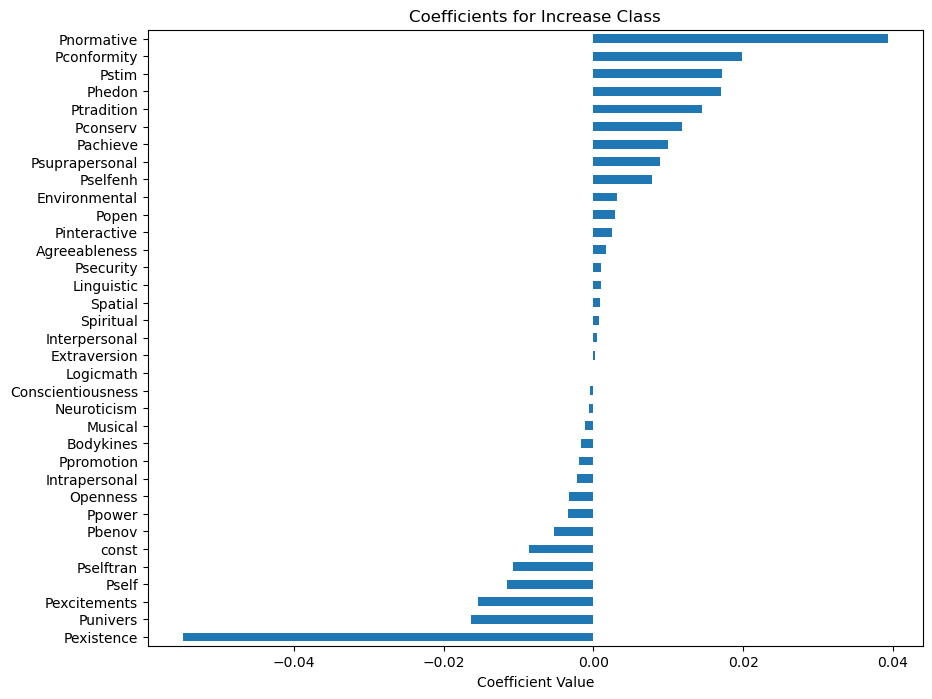

In [20]:
increase_coefs = coef_df[coef_df['Class'] == 'Increase'].iloc[0, 1:-1]  # Exclude 'Class' and 'Intercept'
increase_coefs.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Coefficients for Increase Class')
plt.xlabel('Coefficient Value')
plt.show()

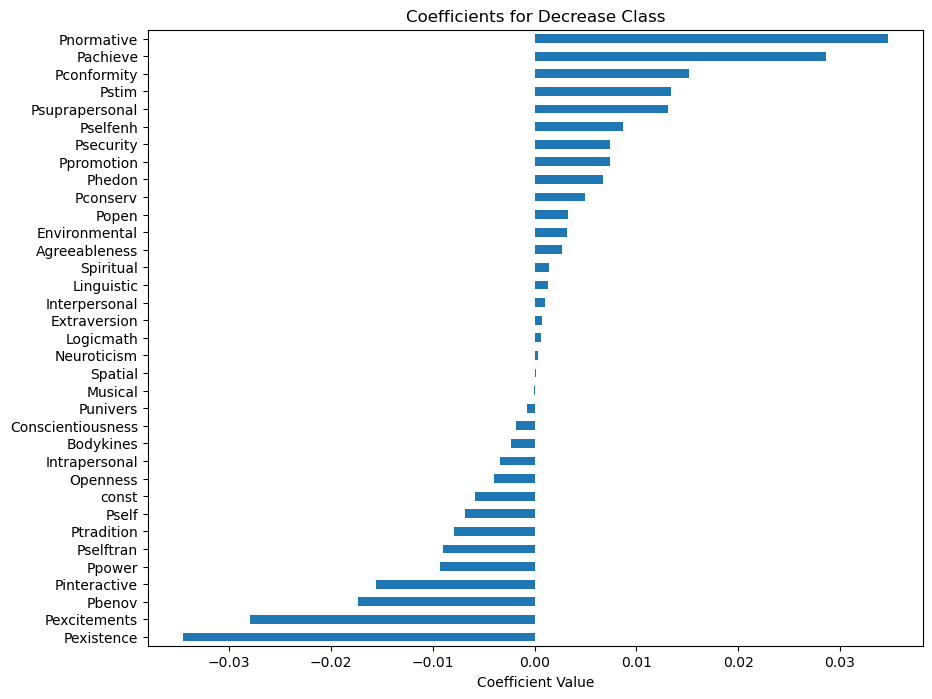

In [21]:
increase_coefs = coef_df[coef_df['Class'] == 'Decrease'].iloc[0, 1:-1]  # Exclude 'Class' and 'Intercept'
increase_coefs.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Coefficients for Decrease Class')
plt.xlabel('Coefficient Value')
plt.show()

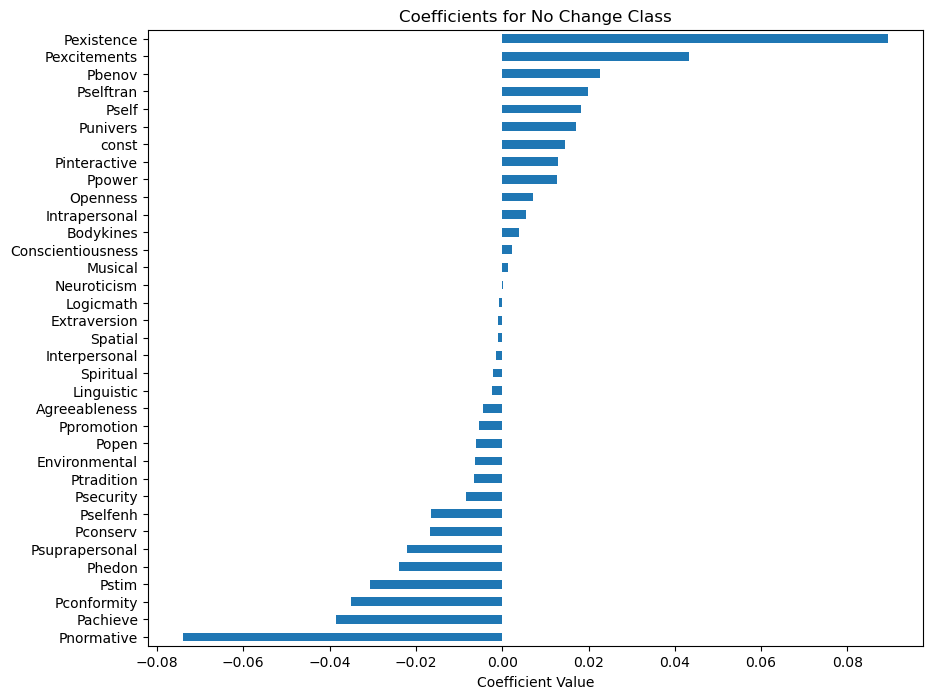

In [22]:
increase_coefs = coef_df[coef_df['Class'] == 'No Change'].iloc[0, 1:-1]  # Exclude 'Class' and 'Intercept'
increase_coefs.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Coefficients for No Change Class')
plt.xlabel('Coefficient Value')
plt.show()

              precision    recall  f1-score   support

    Decrease       0.10      0.27      0.15      1189
    Increase       0.10      0.35      0.16      1148
   No Change       0.87      0.49      0.62     10677

    accuracy                           0.46     13014
   macro avg       0.36      0.37      0.31     13014
weighted avg       0.73      0.46      0.54     13014



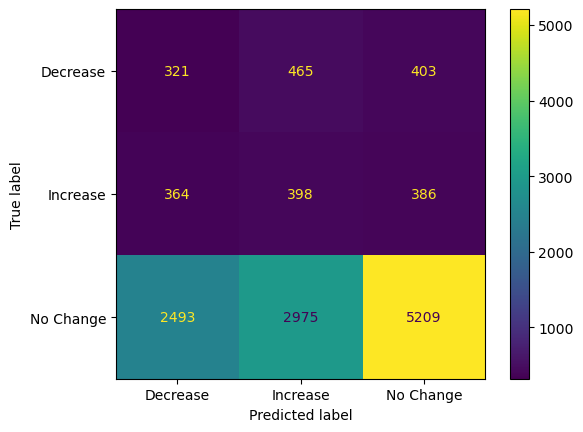

In [9]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features2_linear]
X_test_features = X_test_linear[features2_linear]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

In [10]:
# Get the coefficients for each class
coefficients = model.coef_

# Get the intercepts for each class
intercepts = model.intercept_

# Create a DataFrame to display coefficients for each class
coef_df = pd.DataFrame(coefficients, columns=X_train_features.columns)
coef_df['Intercept'] = intercepts

# Add class names as rows (optional, if y_train is encoded)
coef_df['Class'] = model.classes_

# Rearrange columns to place 'Class' first
coef_df = coef_df[['Class'] + [col for col in coef_df.columns if col != 'Class']]

# Display the coefficients
coef_df

,Class,const,gender_Male,nationality_Foreign,department_Engineering and Applied Sciences,department_Humanities,department_Law,department_Medicine and veterinary medicine,department_Natural Sciences,department_Social Sciences,...,cohort_23,cohort_24,cohort_25-26,cohort_27-30,cohort_31+,degree_MSc,residence_Close to the university,residence_Far from the university,residence_Rovereto,Intercept
0,Decrease,0.035229,-0.210558,-0.315102,0.112161,-0.088043,-0.098776,-0.077639,-0.008439,-0.126438,...,0.000973,0.021295,0.089332,-0.189818,-0.045416,0.031640,0.005181,0.074126,0.024327,0.037566
1,Increase,-0.001179,-0.173741,-0.397088,0.189619,-0.076903,-0.001008,0.087004,-0.020390,0.000090,...,0.108137,0.065229,0.199429,-0.228028,0.097256,-0.073108,-0.101107,0.027230,-0.102548,-0.000461
2,No Change,-0.034050,0.384299,0.712190,-0.301780,0.164946,0.099784,-0.009365,0.028829,0.126348,...,-0.109110,-0.086524,-0.288761,0.417846,-0.051840,0.041468,0.095927,-0.101356,0.078221,-0.037106


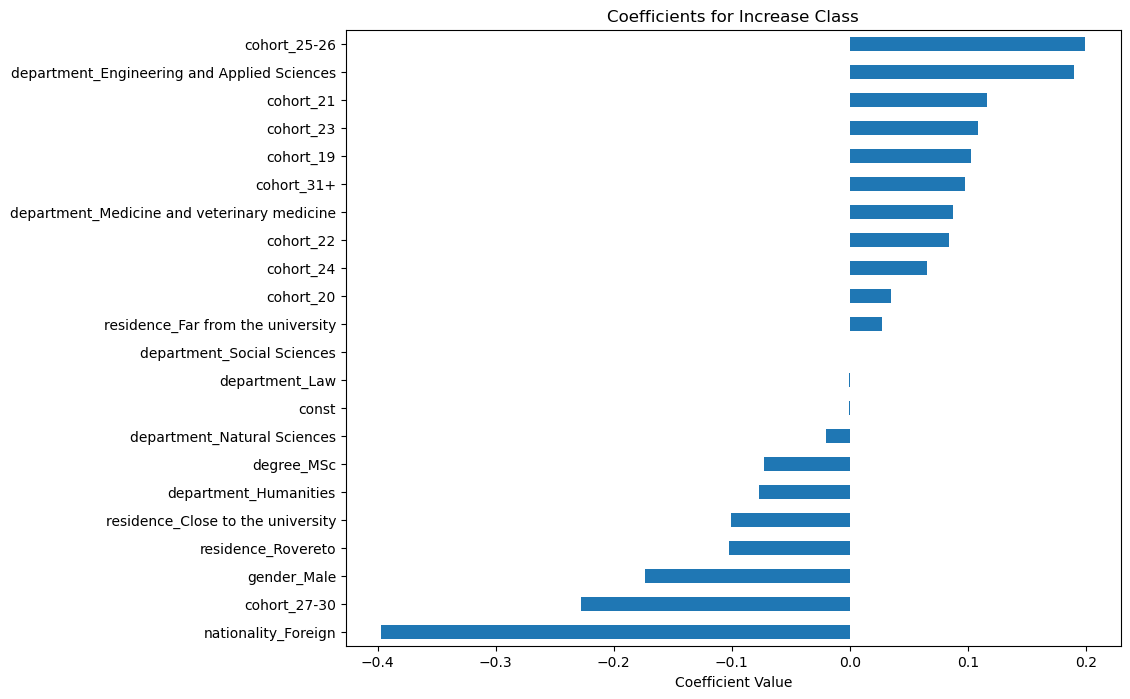

In [11]:
increase_coefs = coef_df[coef_df['Class'] == 'Increase'].iloc[0, 1:-1]  # Exclude 'Class' and 'Intercept'
increase_coefs.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Coefficients for Increase Class')
plt.xlabel('Coefficient Value')
plt.show()

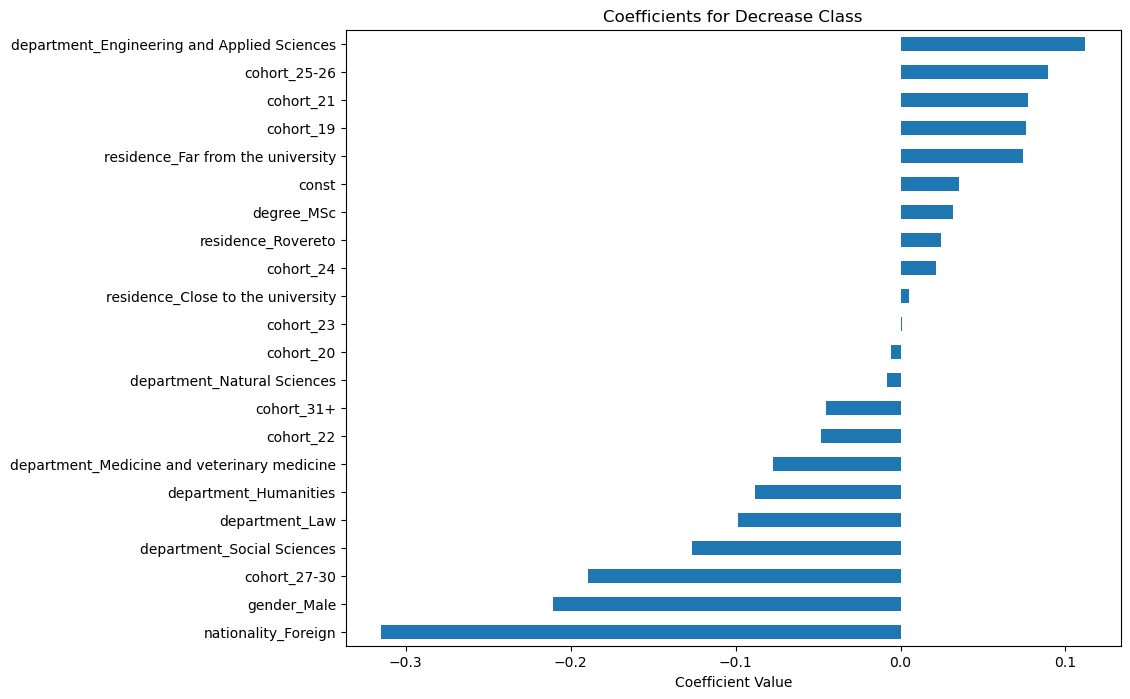

In [12]:
increase_coefs = coef_df[coef_df['Class'] == 'Decrease'].iloc[0, 1:-1]  # Exclude 'Class' and 'Intercept'
increase_coefs.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Coefficients for Decrease Class')
plt.xlabel('Coefficient Value')
plt.show()

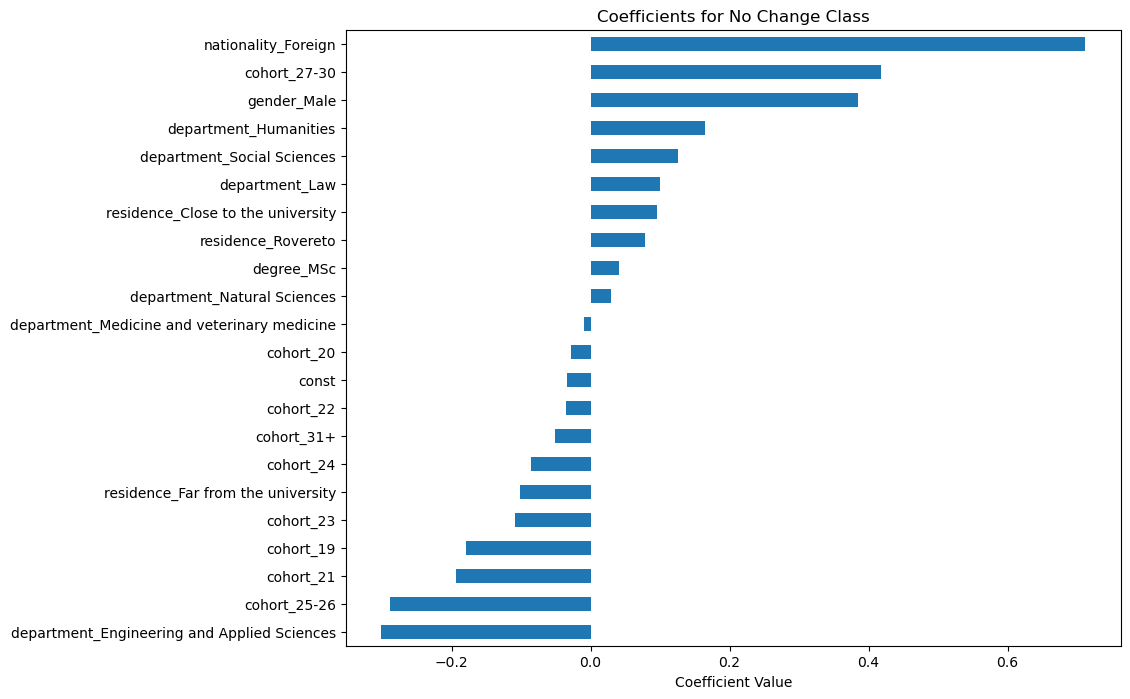

In [13]:
increase_coefs = coef_df[coef_df['Class'] == 'No Change'].iloc[0, 1:-1]  # Exclude 'Class' and 'Intercept'
increase_coefs.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Coefficients for No Change Class')
plt.xlabel('Coefficient Value')
plt.show()

              precision    recall  f1-score   support

    Decrease       0.09      0.37      0.15      1189
    Increase       0.09      0.37      0.15      1148
   No Change       0.83      0.29      0.43     10677

    accuracy                           0.30     13014
   macro avg       0.34      0.34      0.24     13014
weighted avg       0.70      0.30      0.38     13014



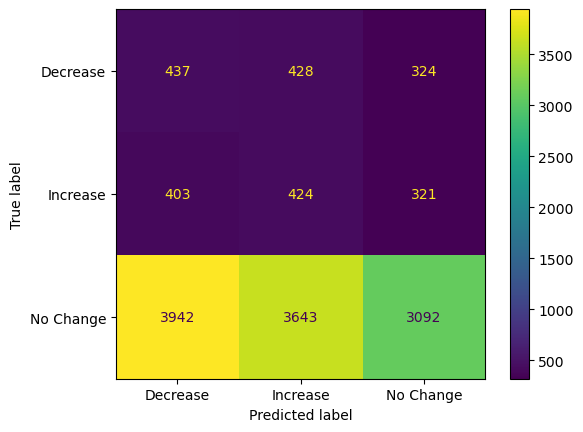

In [28]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features3_linear]
X_test_features = X_test_linear[features3_linear]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

In [30]:
# Get the coefficients for each class
coefficients = model.coef_

# Get the intercepts for each class
intercepts = model.intercept_

# Create a DataFrame to display coefficients for each class
coef_df = pd.DataFrame(coefficients, columns=X_train_features.columns)
coef_df['Intercept'] = intercepts

# Add class names as rows (optional, if y_train is encoded)
coef_df['Class'] = model.classes_

# Rearrange columns to place 'Class' first
coef_df = coef_df[['Class'] + [col for col in coef_df.columns if col != 'Class']]

# Display the coefficients
coef_df

,Class,const,day_of_week_Friday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_07:30:00,time_08:00:00,time_08:30:00,time_09:00:00,time_09:30:00,time_10:00:00,time_10:30:00,time_11:00:00,time_11:30:00,time_12:00:00,time_12:30:00,time_13:00:00,time_13:30:00,time_14:00:00,time_14:30:00,time_15:00:00,time_15:30:00,time_16:00:00,time_16:30:00,time_17:00:00,time_17:30:00,time_18:00:00,time_18:30:00,time_19:00:00,time_19:30:00,time_20:00:00,time_20:30:00,time_21:00:00,time_21:30:00,time_22:00:00,time_22:30:00,time_23:00:00,time_23:30:00,time_00:00:00,time_00:30:00,time_01:00:00,time_01:30:00,time_02:00:00,Intercept
0,Decrease,0.047307,-0.026058,-0.042851,-0.015271,-0.043382,-0.019972,-0.111211,-0.187957,-0.312890,-0.163147,0.009614,-0.110887,-0.140509,-0.039439,0.185254,-0.195506,-0.158027,-0.236240,-0.014826,0.014895,-0.145953,-0.038571,-0.093952,-0.069017,-0.128527,0.035233,-0.058480,-0.12989,-0.034969,-0.082544,-0.023792,-0.114033,0.025514,-0.145882,-0.099753,-0.135108,0.042416,0.004650,-0.078968,0.013555,-0.092247,0.153479,-0.293907,-0.390984,-0.408009,0.057267
1,Increase,-0.004267,0.032614,0.067858,0.061469,0.086079,0.012684,0.061029,-0.052161,-0.114668,0.162603,-0.102134,0.023717,-0.026286,-0.053796,-0.202911,0.051112,0.013932,0.088001,-0.103300,-0.241148,0.079484,-0.103664,-0.060337,-0.078424,0.087201,-0.047722,-0.017018,-0.00241,-0.031888,-0.018587,-0.077684,-0.044039,-0.144816,0.030503,0.008870,0.037713,-0.154343,-0.074732,-0.013250,-0.067271,0.094967,-0.221961,0.002450,0.244199,0.200105,-0.009605
2,No Change,-0.043040,-0.006556,-0.025008,-0.046198,-0.042697,0.007288,0.050182,0.240118,0.427559,0.000544,0.092520,0.087170,0.166794,0.093235,0.017657,0.144394,0.144095,0.148239,0.118126,0.226252,0.066470,0.142235,0.154289,0.147441,0.041326,0.012489,0.075498,0.13230,0.066857,0.101132,0.101476,0.158072,0.119302,0.115379,0.090883,0.097395,0.111927,0.070081,0.092218,0.053716,-0.002720,0.068482,0.291457,0.146785,0.207904,-0.047662


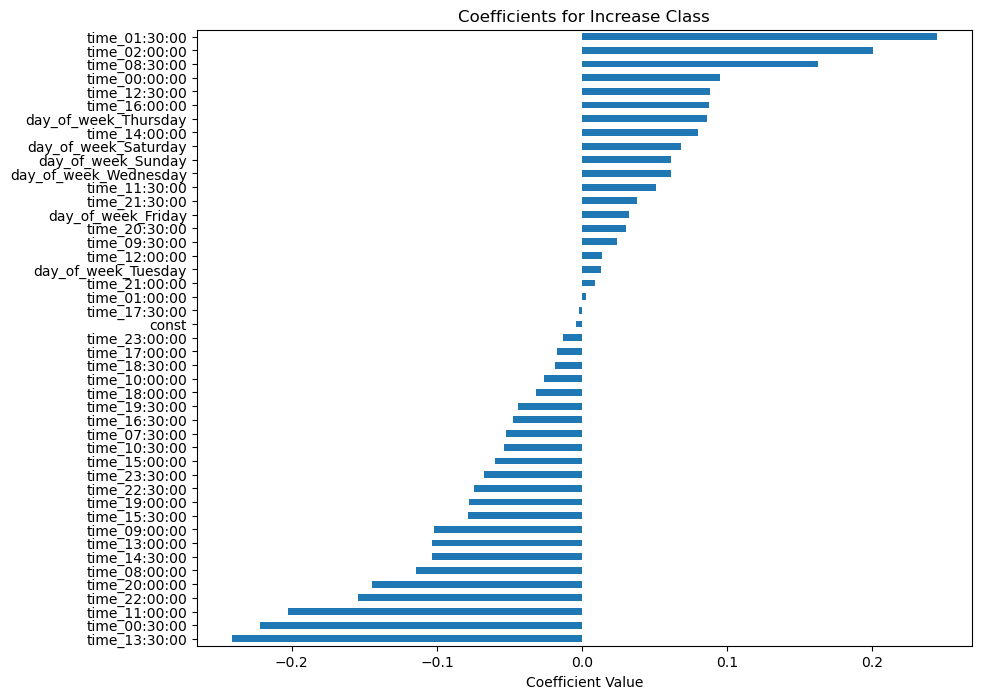

In [31]:
increase_coefs = coef_df[coef_df['Class'] == 'Increase'].iloc[0, 1:-1]  # Exclude 'Class' and 'Intercept'
increase_coefs.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Coefficients for Increase Class')
plt.xlabel('Coefficient Value')
plt.show()

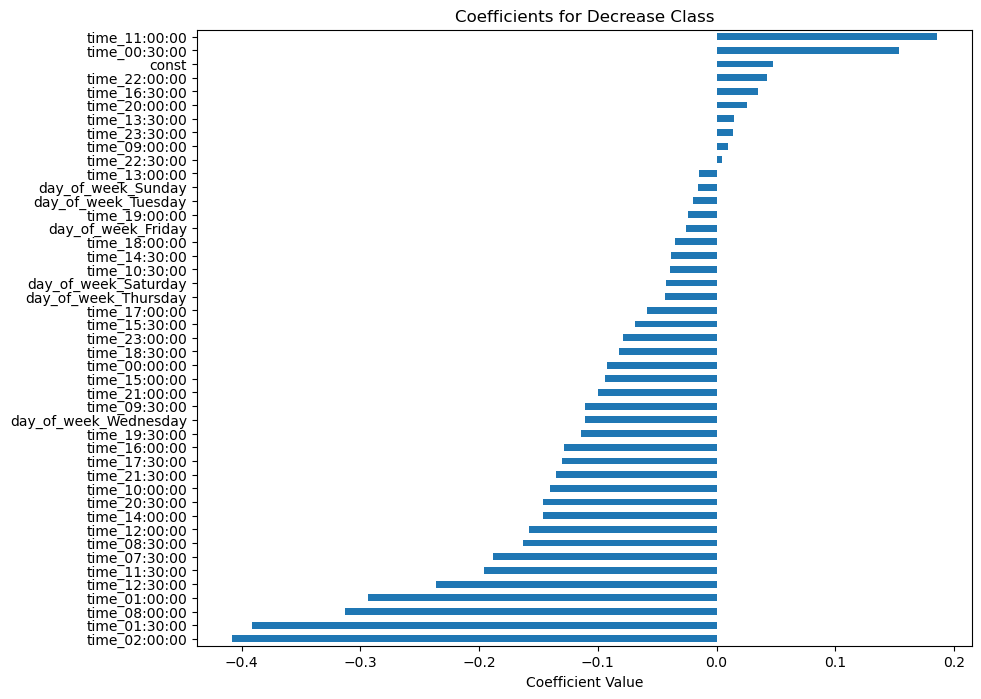

In [32]:
increase_coefs = coef_df[coef_df['Class'] == 'Decrease'].iloc[0, 1:-1]  # Exclude 'Class' and 'Intercept'
increase_coefs.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Coefficients for Decrease Class')
plt.xlabel('Coefficient Value')
plt.show()

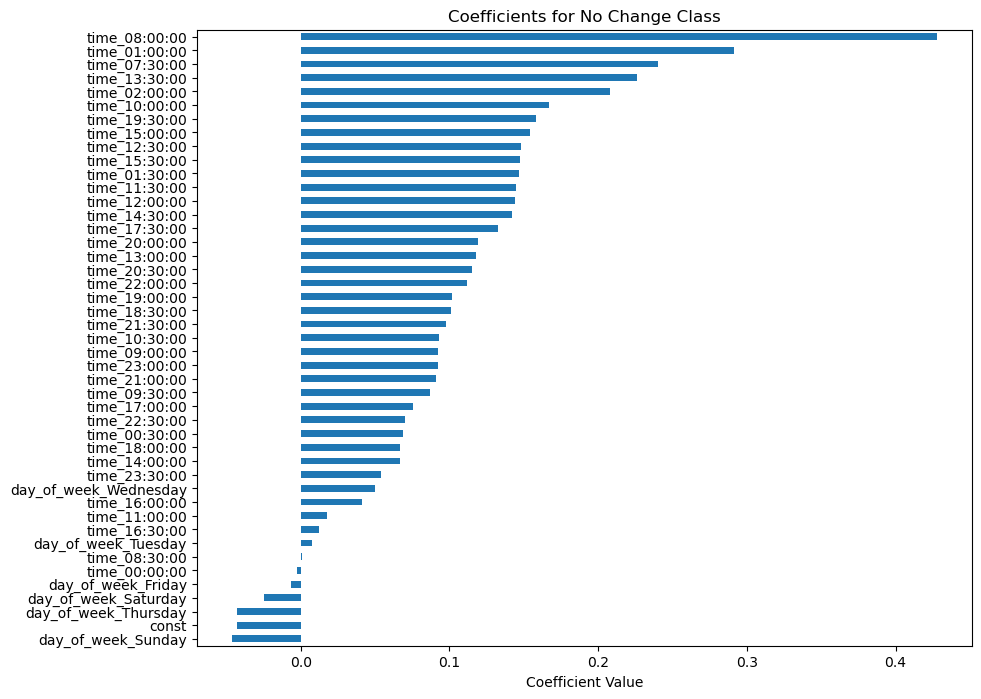

In [33]:
increase_coefs = coef_df[coef_df['Class'] == 'No Change'].iloc[0, 1:-1]  # Exclude 'Class' and 'Intercept'
increase_coefs.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Coefficients for No Change Class')
plt.xlabel('Coefficient Value')
plt.show()

              precision    recall  f1-score   support

    Decrease       0.09      0.22      0.13      1189
    Increase       0.10      0.23      0.14      1148
   No Change       0.83      0.59      0.69     10677

    accuracy                           0.52     13014
   macro avg       0.34      0.35      0.32     13014
weighted avg       0.70      0.52      0.59     13014



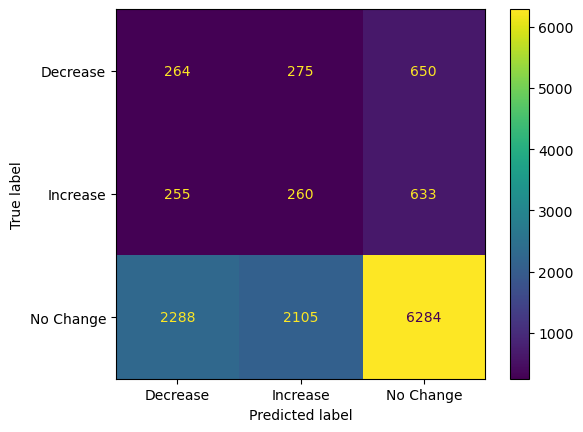

In [34]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features4_linear]
X_test_features = X_test_linear[features4_linear]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

In [35]:
# Get the coefficients for each class
coefficients = model.coef_

# Get the intercepts for each class
intercepts = model.intercept_

# Create a DataFrame to display coefficients for each class
coef_df = pd.DataFrame(coefficients, columns=X_train_features.columns)
coef_df['Intercept'] = intercepts

# Add class names as rows (optional, if y_train is encoded)
coef_df['Class'] = model.classes_

# Rearrange columns to place 'Class' first
coef_df = coef_df[['Class'] + [col for col in coef_df.columns if col != 'Class']]

# Display the coefficients
coef_df

,Class,const,what2_DistantCommunication/SeekingInternet,what2_Eating,what2_Householdcare/Shopping,what2_Lecture,what2_Leisure,what2_Listeningmusic/Reading,what2_Social media,what2_Sociallife/Happy Hour,what2_Study/workgroup,what2_Travel,what2_Watching/TV/YouTube,what2_Work/Other,withw2_Classmates,withw2_Colleagues/Other,withw2_Friends,withw2_Partner,withw2_Relatives,withw2_Roommates,where2_AnotherIndoor,where2_AnotherOutdoor,where2_Classroom/Uni_Library,where2_House/friends/others,where2_RelativesHome,Intercept
0,Decrease,-0.004942,0.070810,-0.046516,0.187223,0.010226,-0.059417,-0.055170,0.040143,-0.042537,-0.042503,-0.087467,0.012477,-0.079062,0.049767,0.100422,0.040746,0.045656,0.006379,0.034521,-0.038559,0.091256,-0.225425,0.040959,0.093427,-0.005480
1,Increase,-0.036386,-0.008284,0.016995,-0.054200,0.071621,0.109720,0.065176,0.094605,-0.048295,0.044376,0.238867,0.063729,0.108272,0.215209,-0.177008,0.045374,-0.041228,0.033145,-0.077234,0.068396,-0.151144,-0.143180,0.023854,0.072368,-0.038511
2,No Change,0.041328,-0.062526,0.029522,-0.133023,-0.081847,-0.050303,-0.010005,-0.134748,0.090831,-0.001873,-0.151400,-0.076206,-0.029210,-0.264976,0.076586,-0.086120,-0.004428,-0.039525,0.042714,-0.029836,0.059887,0.368604,-0.064813,-0.165795,0.043991


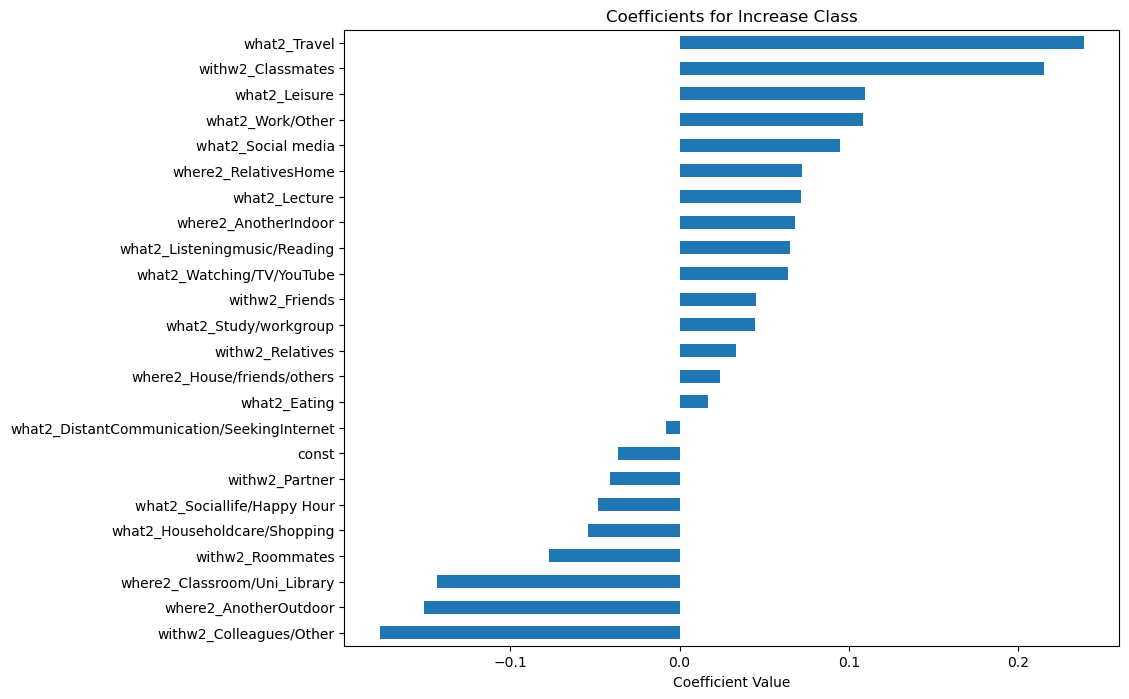

In [36]:
increase_coefs = coef_df[coef_df['Class'] == 'Increase'].iloc[0, 1:-1]  # Exclude 'Class' and 'Intercept'
increase_coefs.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Coefficients for Increase Class')
plt.xlabel('Coefficient Value')
plt.show()

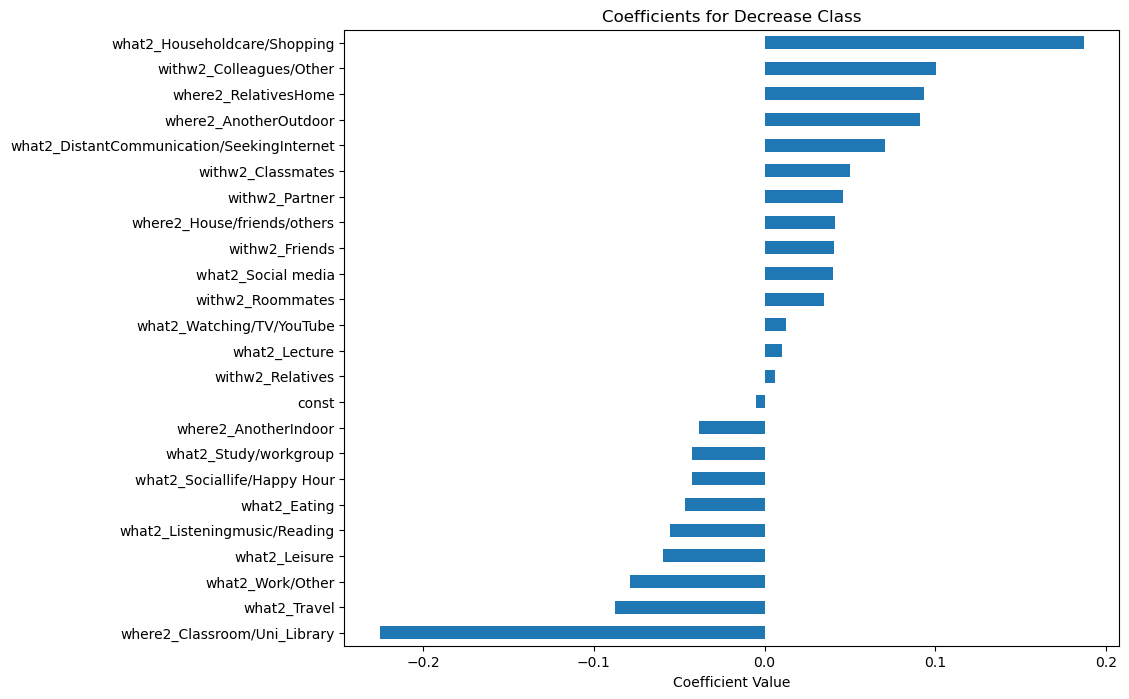

In [37]:
increase_coefs = coef_df[coef_df['Class'] == 'Decrease'].iloc[0, 1:-1]  # Exclude 'Class' and 'Intercept'
increase_coefs.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Coefficients for Decrease Class')
plt.xlabel('Coefficient Value')
plt.show()

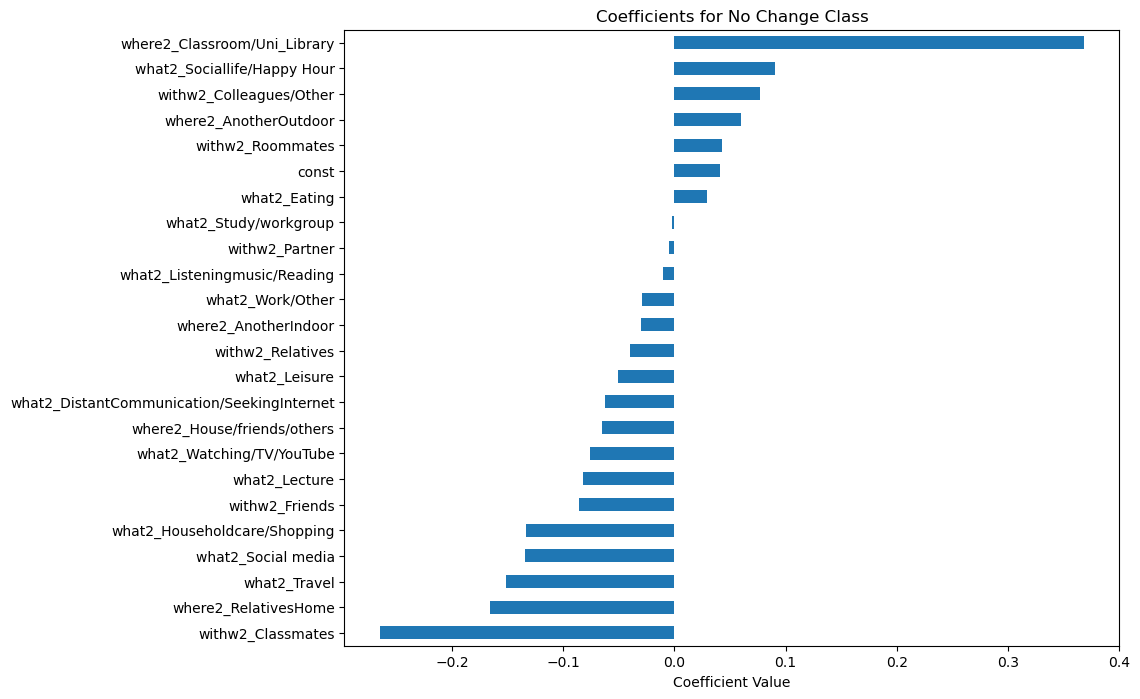

In [38]:
increase_coefs = coef_df[coef_df['Class'] == 'No Change'].iloc[0, 1:-1]  # Exclude 'Class' and 'Intercept'
increase_coefs.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Coefficients for No Change Class')
plt.xlabel('Coefficient Value')
plt.show()

              precision    recall  f1-score   support

    Decrease       0.11      0.32      0.17      1189
    Increase       0.13      0.39      0.20      1148
   No Change       0.91      0.54      0.67     10677

    accuracy                           0.50     13014
   macro avg       0.39      0.42      0.35     13014
weighted avg       0.77      0.50      0.59     13014



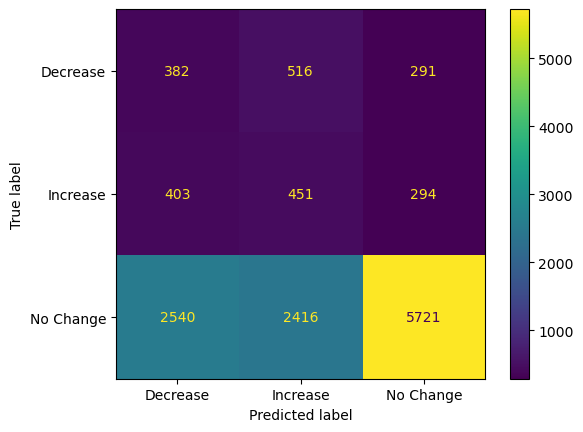

In [54]:
X_train_features = X_train[features1]
X_test_features = X_test[features1]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.11      0.27      0.16      1189
    Increase       0.11      0.39      0.17      1148
   No Change       0.89      0.50      0.64     10677

    accuracy                           0.47     13014
   macro avg       0.37      0.39      0.32     13014
weighted avg       0.75      0.47      0.56     13014



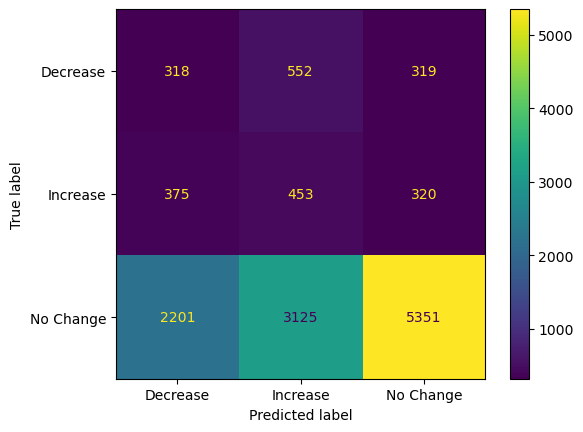

In [55]:
X_train_features = X_train[features2]
X_test_features = X_test[features2]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.10      0.33      0.15      1189
    Increase       0.08      0.32      0.13      1148
   No Change       0.82      0.35      0.49     10677

    accuracy                           0.35     13014
   macro avg       0.33      0.33      0.26     13014
weighted avg       0.69      0.35      0.43     13014



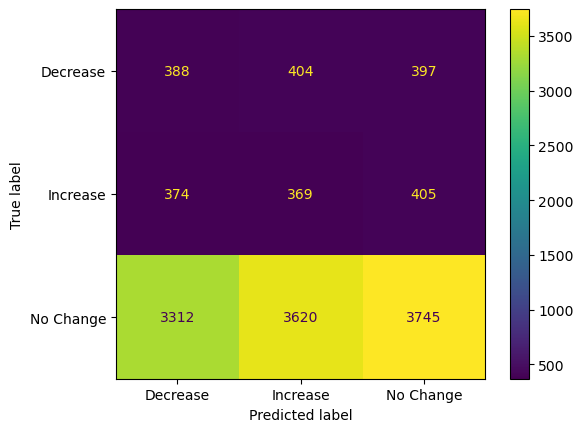

In [56]:
X_train_features = X_train[features3]
X_test_features = X_test[features3]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.09      0.27      0.13      1189
    Increase       0.09      0.33      0.14      1148
   No Change       0.83      0.39      0.53     10677

    accuracy                           0.37     13014
   macro avg       0.33      0.33      0.27     13014
weighted avg       0.69      0.37      0.46     13014



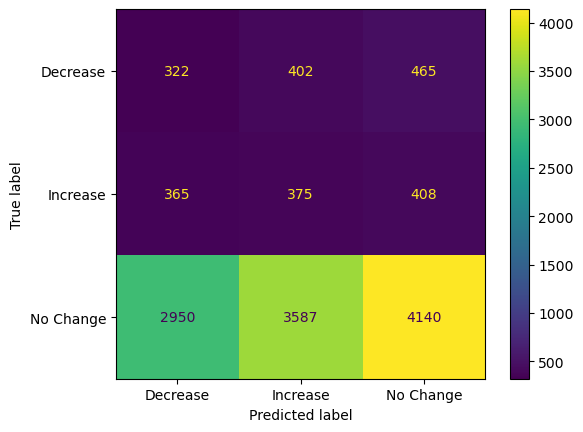

In [57]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.15      0.03      0.05      1189
    Increase       0.13      0.03      0.06      1148
   No Change       0.83      0.96      0.89     10677

    accuracy                           0.80     13014
   macro avg       0.37      0.34      0.33     13014
weighted avg       0.70      0.80      0.74     13014



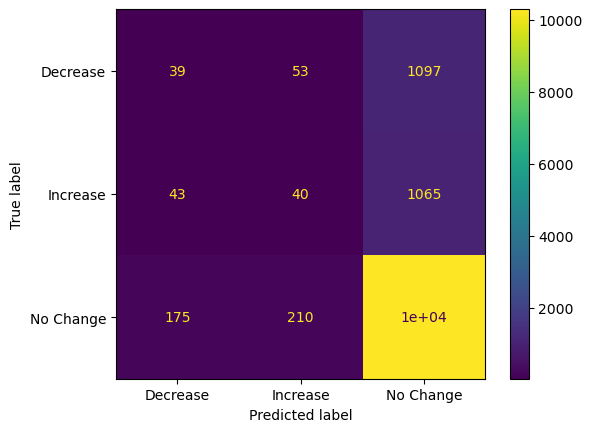

In [20]:
X_train_features = X_train[features5]
X_test_features = X_test[features5]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

In [21]:
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
pd.set_option('display.max_rows', None)
print(importance_df)

                                               Feature  Importance
63                                  day_of_week_Sunday    0.027396
62                                day_of_week_Saturday    0.027260
39                                       what2_Leisure    0.025631
61                                  day_of_week_Monday    0.025000
65                                 day_of_week_Tuesday    0.024672
64                                day_of_week_Thursday    0.023860
60                                  day_of_week_Friday    0.023293
66                               day_of_week_Wednesday    0.023178
43                               what2_Study/workgroup    0.020675
47                                        withw2_Alone    0.020095
36                                        what2_Eating    0.017177
45                           what2_Watching/TV/YouTube    0.017047
115                                      time_17:00:00    0.014817
114                                      time_16:30:00    0.01

              precision    recall  f1-score   support

    Decrease       0.11      0.28      0.16      1189
    Increase       0.14      0.43      0.21      1148
   No Change       0.91      0.54      0.67     10677

    accuracy                           0.50     13014
   macro avg       0.38      0.42      0.35     13014
weighted avg       0.77      0.50      0.59     13014



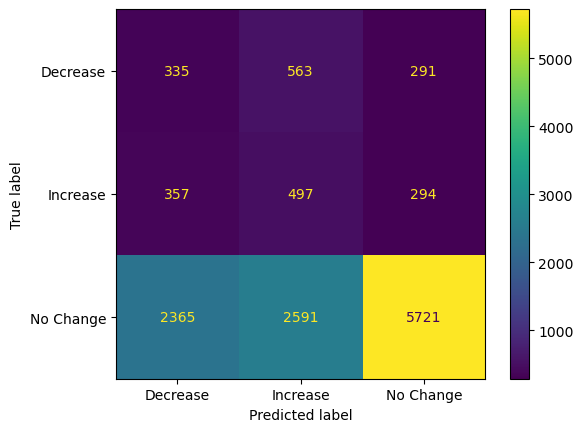

In [39]:
X_train_features = X_train[features1]
X_test_features = X_test[features1]

label_mapping = {'Decrease': 0, 'Increase': 1, 'No Change': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['Decrease', 'Increase', 'No Change']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['Decrease', 'Increase', 'No Change'])

              precision    recall  f1-score   support

    Decrease       0.11      0.29      0.16      1189
    Increase       0.11      0.40      0.17      1148
   No Change       0.90      0.47      0.62     10677

    accuracy                           0.45     13014
   macro avg       0.37      0.39      0.31     13014
weighted avg       0.76      0.45      0.54     13014



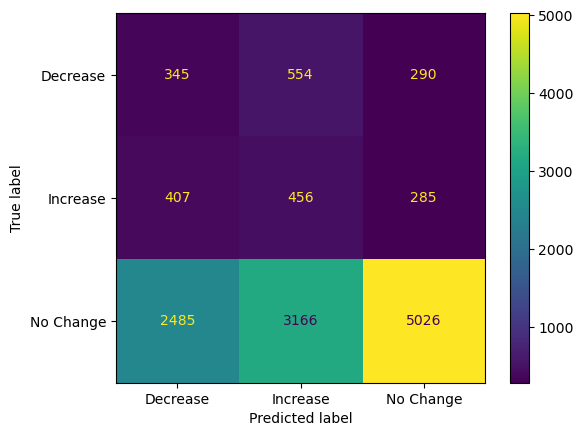

In [40]:
X_train_features = X_train[features2]
X_test_features = X_test[features2]

label_mapping = {'Decrease': 0, 'Increase': 1, 'No Change': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['Decrease', 'Increase', 'No Change']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['Decrease', 'Increase', 'No Change'])

              precision    recall  f1-score   support

    Decrease       0.09      0.36      0.15      1189
    Increase       0.09      0.39      0.14      1148
   No Change       0.82      0.26      0.40     10677

    accuracy                           0.28     13014
   macro avg       0.33      0.34      0.23     13014
weighted avg       0.69      0.28      0.35     13014



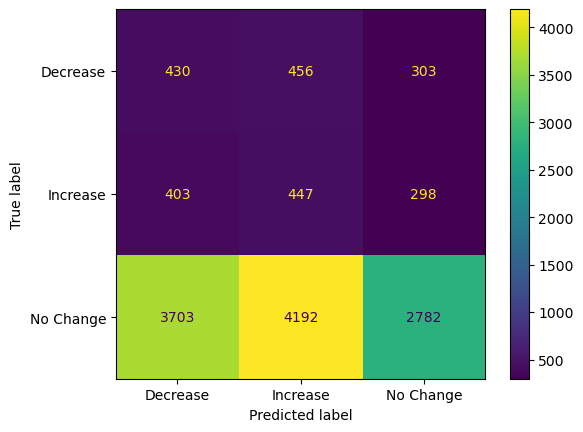

In [41]:
X_train_features = X_train[features3]
X_test_features = X_test[features3]

label_mapping = {'Decrease': 0, 'Increase': 1, 'No Change': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['Decrease', 'Increase', 'No Change']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['Decrease', 'Increase', 'No Change'])

              precision    recall  f1-score   support

    Decrease       0.09      0.32      0.14      1189
    Increase       0.09      0.35      0.14      1148
   No Change       0.83      0.32      0.46     10677

    accuracy                           0.32     13014
   macro avg       0.34      0.33      0.25     13014
weighted avg       0.70      0.32      0.41     13014



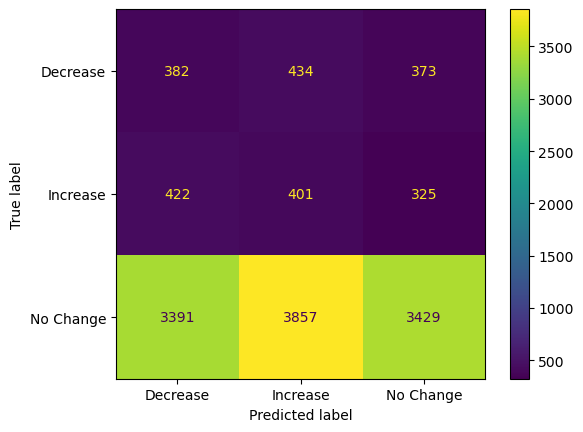

In [42]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

label_mapping = {'Decrease': 0, 'Increase': 1, 'No Change': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['Decrease', 'Increase', 'No Change']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['Decrease', 'Increase', 'No Change'])

              precision    recall  f1-score   support

    Decrease       0.12      0.30      0.17      1189
    Increase       0.13      0.32      0.18      1148
   No Change       0.89      0.60      0.72     10677

    accuracy                           0.55     13014
   macro avg       0.38      0.41      0.36     13014
weighted avg       0.75      0.55      0.62     13014



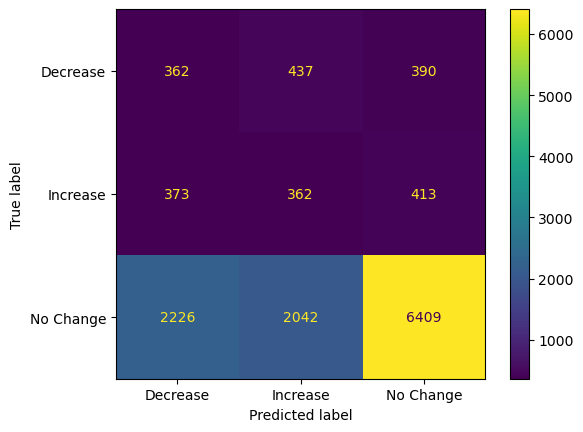

In [12]:
X_train_features = X_train[features5]
X_test_features = X_test[features5]

label_mapping = {'Decrease': 0, 'Increase': 1, 'No Change': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['Decrease', 'Increase', 'No Change']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['Decrease', 'Increase', 'No Change'])

In [13]:
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
pd.set_option('display.max_rows', None)
print(importance_df)

                                               Feature  Importance
22                                          Ppromotion    0.017693
75                                      department_Law    0.017133
32                                       Environmental    0.016995
3                                          Neuroticism    0.016729
30                                       Interpersonal    0.014502
20                                      Psuprapersonal    0.013955
5                                          Pconformity    0.013468
28                                           Bodykines    0.013168
29                                             Musical    0.012769
94                                    residence_Trento    0.012340
16                                            Pselfenh    0.012080
25                                          Linguistic    0.012054
24                                          Pnormative    0.012031
18                                            Pconserv    0.01

Ridge Logistic Regression:
              precision    recall  f1-score   support

    Decrease       0.11      0.32      0.17      1189
    Increase       0.11      0.36      0.17      1148
   No Change       0.88      0.51      0.64     10677

    accuracy                           0.48     13014
   macro avg       0.37      0.39      0.33     13014
weighted avg       0.74      0.48      0.56     13014



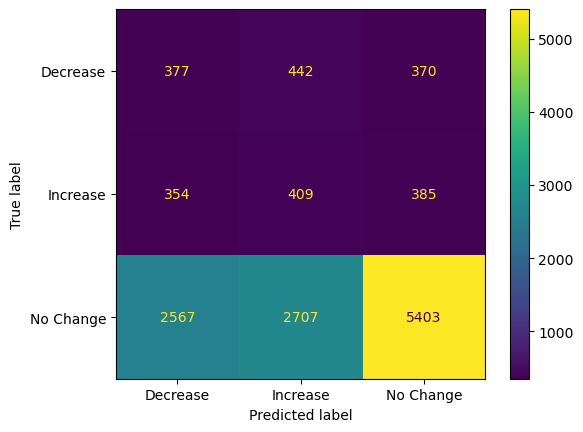

In [66]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features5])
X_test_scaled = scaler.transform(X_test[features5])

# Ridge Logistic Regression
ridge_model = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', max_iter=1000, class_weight='balanced')
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate Ridge
print("Ridge Logistic Regression:")
print(classification_report(y_test, y_pred_ridge))
ConfusionMatrixDisplay.from_estimator(ridge_model, X_test_scaled, y_test)

Lasso Logistic Regression:
              precision    recall  f1-score   support

    Decrease       0.17      0.03      0.06      1189
    Increase       0.15      0.05      0.07      1148
   No Change       0.83      0.96      0.89     10677

    accuracy                           0.80     13014
   macro avg       0.38      0.35      0.34     13014
weighted avg       0.71      0.80      0.74     13014



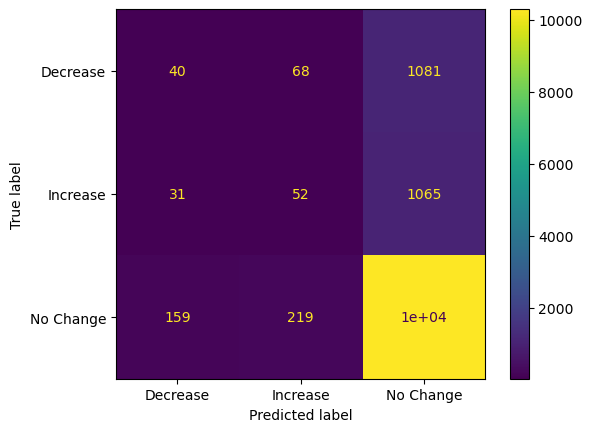

In [70]:
# Lasso Logistic Regression
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', max_iter=300, class_weight='balanced')
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate Lasso
print("Lasso Logistic Regression:")
print(classification_report(y_test, y_pred_lasso))
ConfusionMatrixDisplay.from_estimator(lasso_model, X_test_scaled, y_test)

Logistic Regression with PCA:
              precision    recall  f1-score   support

    Decrease       0.10      0.29      0.15      1189
    Increase       0.11      0.37      0.17      1148
   No Change       0.87      0.47      0.61     10677

    accuracy                           0.45     13014
   macro avg       0.36      0.38      0.31     13014
weighted avg       0.73      0.45      0.53     13014



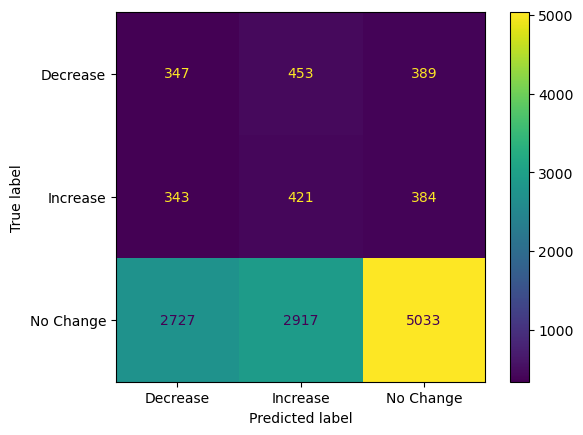

In [67]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Logistic Regression on PCA-transformed data
pca_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
pca_model.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = pca_model.predict(X_test_pca)

# Evaluate PCA Model
print("Logistic Regression with PCA:")
print(classification_report(y_test, y_pred_pca))
ConfusionMatrixDisplay.from_estimator(pca_model, X_test_pca, y_test)

In [68]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {num_components}")

Number of components explaining 95% variance: 95


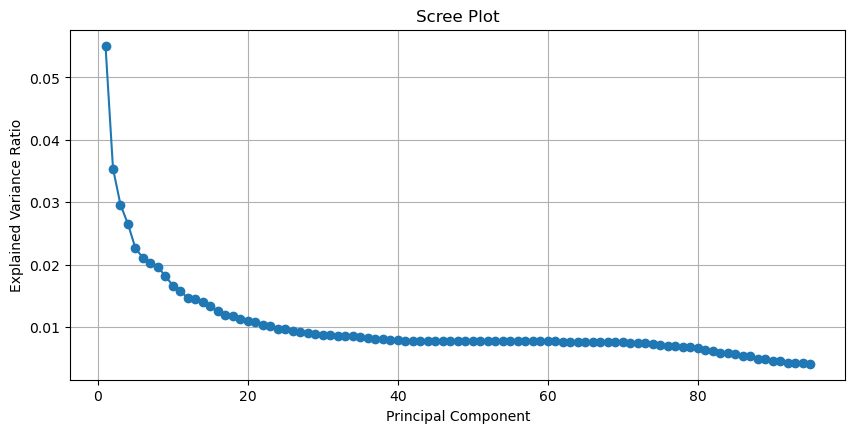

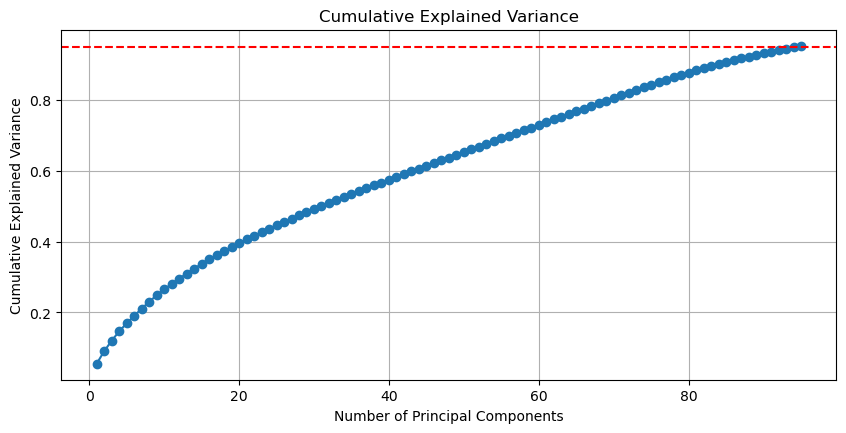

In [69]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(2,1,2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [20]:
# Define the feature matrix (X) and the target variable (y)
X = df_workday.drop(columns=['mood_change'])
y = df_workday['mood_change']

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create modified versions of the training and test sets for linear regression
X_train_linear = X_train.copy()
X_test_linear = X_test.copy()

variables_to_remove = [
    'what2_Cooking', 'withw2_Alone', 'where2_HomeApartment/room', 'day_type_Holiday', 
    'day_of_week_Monday', 'gender_Female', 'nationality_Italian', 
    'department_Business/economics', 'cohort_17-18', 'degree_BSc', 
    'residence_Trento', 'time_07:00:00'
]

# Remove the specified variables from X_train_linear
X_train_linear = X_train_linear.drop(columns=variables_to_remove, errors='ignore')
X_test_linear = X_test_linear.drop(columns=variables_to_remove, errors='ignore')

In [21]:
features1 = ['Extraversion',  'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Pconformity', 'Ptradition', 'Pbenov', 'Punivers', 'Pself', 'Pstim',
       'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen', 'Pselfenh',
       'Pselftran', 'Pconserv', 'Pexcitements', 'Psuprapersonal',
       'Pinteractive', 'Ppromotion', 'Pexistence', 'Pnormative', 'Linguistic',
       'Logicmath', 'Spatial', 'Bodykines', 'Musical', 'Interpersonal',
       'Intrapersonal', 'Environmental', 'Spiritual']

features2 = ['gender_Female', 'gender_Male', 'nationality_Italian', 'nationality_Foreign', 'department_Business/economics', 
            'department_Engineering and Applied Sciences', 'department_Humanities', 'department_International Relations and Public Administration', 
            'department_Law', 'department_Medicine and veterinary medicine', 'department_Natural Sciences', 'department_Social Sciences', 
            'cohort_17-18', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22', 'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27-30', 
            'cohort_31+', 'degree_BSc', 'degree_MSc', 'residence_Close to the city where the university is located (less than 1.30 hours of travel).', 
            'residence_In another city away from where the university is located (more than 1.30 hours of travel)', 'residence_Rovereto', 
            'residence_Trento']

features2_linear = ['gender_Male', 'nationality_Foreign', 
       'department_Engineering and Applied Sciences', 'department_Humanities', 
       'department_Law', 'department_Medicine and veterinary medicine', 
       'department_Natural Sciences', 'department_Social Sciences', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22', 'cohort_23', 
       'cohort_24', 'cohort_25-26', 'cohort_27-30', 'cohort_31+', 'degree_MSc', 
       'residence_Close to the city where the university is located (less than 1.30 hours of travel).', 
       'residence_In another city away from where the university is located (more than 1.30 hours of travel)', 'residence_Rovereto']

features3 = ['what2_Cooking', 'what2_DistantCommunication/SeekingInternet', 'what2_Eating', 'what2_Householdcare/Shopping', 'what2_Lecture', 
            'what2_Leisure', 'what2_Listeningmusic/Reading', 'what2_Social media', 'what2_Sociallife/Happy Hour', 'what2_Study/workgroup', 
            'what2_Travel', 'what2_Watching/TV/YouTube', 'what2_Work/Other', 'withw2_Alone', 'withw2_Classmates', 'withw2_Colleagues/Other', 
            'withw2_Friends', 'withw2_Partner', 'withw2_Relatives', 'withw2_Roommates', 'where2_AnotherIndoor', 
            'where2_AnotherOutdoor', 'where2_Classroom/Uni_Library', 'where2_HomeApartment/room', 'where2_House/friends/others', 
            'where2_RelativesHome', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 
            'day_of_week_Wednesday',
            'time_07:00:00', 'time_07:30:00', 'time_08:00:00', 'time_08:30:00', 'time_09:00:00', 'time_09:30:00', 'time_10:00:00', 
            'time_10:30:00', 'time_11:00:00', 'time_11:30:00', 'time_12:00:00', 'time_12:30:00', 'time_13:00:00', 'time_13:30:00', 
            'time_14:00:00', 'time_14:30:00', 'time_15:00:00', 'time_15:30:00', 'time_16:00:00', 'time_16:30:00', 'time_17:00:00', 
            'time_17:30:00', 'time_18:00:00', 'time_18:30:00', 'time_19:00:00', 'time_19:30:00', 'time_20:00:00', 'time_20:30:00', 
            'time_21:00:00', 'time_21:30:00', 'time_22:00:00', 'time_22:30:00', 'time_23:00:00', 'time_23:30:00', 'time_00:00:00', 
            'time_00:30:00', 'time_01:00:00', 'time_01:30:00', 'time_02:00:00']

features3_linear = ['what2_DistantCommunication/SeekingInternet', 'what2_Eating', 'what2_Householdcare/Shopping', 'what2_Lecture', 'what2_Leisure', 
            'what2_Listeningmusic/Reading', 'what2_Social media', 'what2_Sociallife/Happy Hour', 'what2_Study/workgroup', 'what2_Travel', 
            'what2_Watching/TV/YouTube', 'what2_Work/Other', 'withw2_Classmates', 'withw2_Colleagues/Other', 'withw2_Friends', 'withw2_Partner',
            'withw2_Relatives', 'withw2_Roommates', 'where2_AnotherIndoor', 'where2_AnotherOutdoor', 
            'where2_Classroom/Uni_Library', 'where2_House/friends/others', 'where2_RelativesHome', 'day_of_week_Friday', 
            'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
            'time_07:30:00', 'time_08:00:00', 'time_08:30:00', 'time_09:00:00', 'time_09:30:00', 'time_10:00:00', 'time_10:30:00', 
            'time_11:00:00', 'time_11:30:00', 'time_12:00:00', 'time_12:30:00', 'time_13:00:00', 'time_13:30:00', 'time_14:00:00', 
            'time_14:30:00', 'time_15:00:00', 'time_15:30:00', 'time_16:00:00', 'time_16:30:00', 'time_17:00:00', 'time_17:30:00', 
            'time_18:00:00', 'time_18:30:00', 'time_19:00:00', 'time_19:30:00', 'time_20:00:00', 'time_20:30:00', 'time_21:00:00', 
            'time_21:30:00', 'time_22:00:00', 'time_22:30:00', 'time_23:00:00', 'time_23:30:00', 'time_00:00:00', 'time_00:30:00', 
            'time_01:00:00', 'time_01:30:00', 'time_02:00:00']

features4 = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness', 'Pconformity', 'Ptradition', 'Pbenov', 
            'Punivers', 'Pself', 'Pstim', 'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen', 'Pselfenh', 'Pselftran', 'Pconserv', 
            'Pexcitements', 'Psuprapersonal', 'Pinteractive', 'Ppromotion', 'Pexistence', 'Pnormative', 'Linguistic', 'Logicmath', 'Spatial', 
            'Bodykines', 'Musical', 'Interpersonal', 'Intrapersonal', 'Environmental', 'Spiritual',
            'what2_Cooking', 'what2_DistantCommunication/SeekingInternet', 'what2_Eating', 'what2_Householdcare/Shopping', 'what2_Lecture', 
            'what2_Leisure', 'what2_Listeningmusic/Reading', 'what2_Social media', 'what2_Sociallife/Happy Hour', 'what2_Study/workgroup', 
            'what2_Travel', 'what2_Watching/TV/YouTube', 'what2_Work/Other', 'withw2_Alone', 'withw2_Classmates', 'withw2_Colleagues/Other', 
            'withw2_Friends', 'withw2_Partner', 'withw2_Relatives', 'withw2_Roommates', 'where2_AnotherIndoor', 
            'where2_AnotherOutdoor', 'where2_Classroom/Uni_Library', 'where2_HomeApartment/room', 'where2_House/friends/others', 
            'where2_RelativesHome', 'day_of_week_Friday', 'day_of_week_Monday', 'day_of_week_Thursday', 'day_of_week_Tuesday', 
            'day_of_week_Wednesday', 
            'gender_Female', 'gender_Male', 'nationality_Italian', 'nationality_Foreign', 'department_Business/economics', 
            'department_Engineering and Applied Sciences', 'department_Humanities', 'department_International Relations and Public Administration', 
            'department_Law', 'department_Medicine and veterinary medicine', 'department_Natural Sciences', 'department_Social Sciences', 
            'cohort_17-18', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22', 'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27-30', 
            'cohort_31+', 'degree_BSc', 'degree_MSc', 'residence_Close to the city where the university is located (less than 1.30 hours of travel).', 
            'residence_In another city away from where the university is located (more than 1.30 hours of travel)', 'residence_Rovereto', 'residence_Trento',
            'time_07:00:00', 'time_07:30:00', 'time_08:00:00', 'time_08:30:00', 'time_09:00:00', 'time_09:30:00', 'time_10:00:00', 
            'time_10:30:00', 'time_11:00:00', 'time_11:30:00', 'time_12:00:00', 'time_12:30:00', 'time_13:00:00', 'time_13:30:00', 
            'time_14:00:00', 'time_14:30:00', 'time_15:00:00', 'time_15:30:00', 'time_16:00:00', 'time_16:30:00', 'time_17:00:00', 
            'time_17:30:00', 'time_18:00:00', 'time_18:30:00', 'time_19:00:00', 'time_19:30:00', 'time_20:00:00', 'time_20:30:00', 
            'time_21:00:00', 'time_21:30:00', 'time_22:00:00', 'time_22:30:00', 'time_23:00:00', 'time_23:30:00', 'time_00:00:00', 
            'time_00:30:00', 'time_01:00:00', 'time_01:30:00', 'time_02:00:00']

c:\Users\39348\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    Decrease       0.11      0.24      0.15       986
    Increase       0.12      0.36      0.18       998
   No Change       0.86      0.53      0.66      8333

    accuracy                           0.49     10317
   macro avg       0.36      0.38      0.33     10317
weighted avg       0.72      0.49      0.56     10317



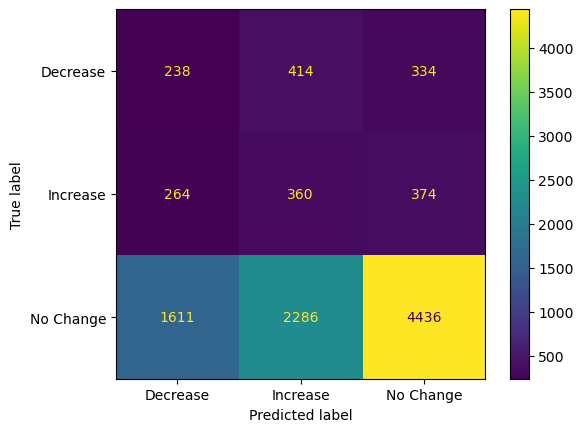

In [22]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features1]
X_test_features = X_test_linear[features1]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.10      0.27      0.15      1189
    Increase       0.10      0.35      0.16      1148
   No Change       0.87      0.49      0.62     10677

    accuracy                           0.46     13014
   macro avg       0.36      0.37      0.31     13014
weighted avg       0.73      0.46      0.54     13014



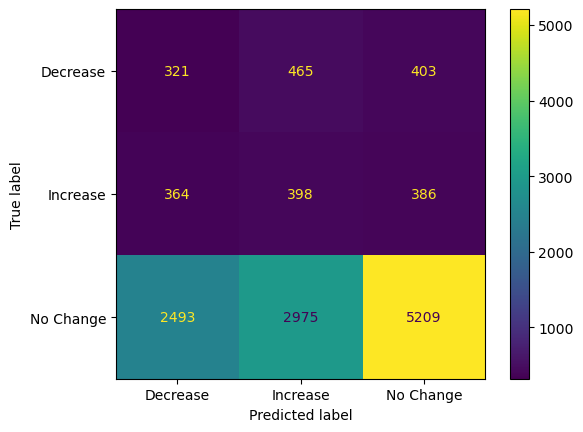

In [30]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features2_linear]
X_test_features = X_test_linear[features2_linear]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

In [31]:
# Get the coefficients for each class
coefficients = model.coef_

# Get the intercepts for each class
intercepts = model.intercept_

# Create a DataFrame to display coefficients for each class
coef_df = pd.DataFrame(coefficients, columns=X_train_features.columns)
coef_df['Intercept'] = intercepts

# Add class names as rows (optional, if y_train is encoded)
coef_df['Class'] = model.classes_

# Rearrange columns to place 'Class' first
coef_df = coef_df[['Class'] + [col for col in coef_df.columns if col != 'Class']]

# Display the coefficients
coef_df

,Class,const,gender_Male,nationality_Western,department_Engineering and Applied Sciences,department_Humanities,department_Law,department_Medicine and veterinary medicine,department_Natural Sciences,department_Social Sciences,cohort_19,cohort_20,cohort_21,cohort_22,cohort_23,cohort_24,cohort_25-26,cohort_27-30,cohort_31+,degree_MSc,residence_Close to the city where the university is located (less than 1.30 hours of travel).,residence_In another city away from where the university is located (more than 1.30 hours of travel),residence_Rovereto,Intercept
0,Decrease,0.035229,-0.210558,-0.315102,0.112161,-0.088043,-0.098776,-0.077639,-0.008439,-0.126438,0.075927,-0.006088,0.077526,-0.048000,0.000973,0.021295,0.089332,-0.189818,-0.045416,0.031640,0.005181,0.074126,0.024327,0.037566
1,Increase,-0.001179,-0.173741,-0.397088,0.189619,-0.076903,-0.001008,0.087004,-0.020390,0.000090,0.102858,0.034486,0.116327,0.083818,0.108137,0.065229,0.199429,-0.228028,0.097256,-0.073108,-0.101107,0.027230,-0.102548,-0.000461
2,No Change,-0.034050,0.384299,0.712190,-0.301780,0.164946,0.099784,-0.009365,0.028829,0.126348,-0.178785,-0.028398,-0.193854,-0.035818,-0.109110,-0.086524,-0.288761,0.417846,-0.051840,0.041468,0.095927,-0.101356,0.078221,-0.037106


              precision    recall  f1-score   support

    Decrease       0.09      0.29      0.14      1189
    Increase       0.10      0.35      0.15      1148
   No Change       0.83      0.40      0.54     10677

    accuracy                           0.39     13014
   macro avg       0.34      0.35      0.28     13014
weighted avg       0.70      0.39      0.47     13014



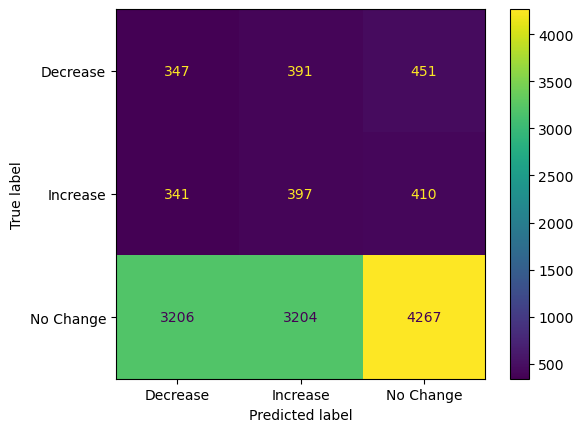

In [28]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features3_linear]
X_test_features = X_test_linear[features3_linear]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

In [29]:
# Get the coefficients for each class
coefficients = model.coef_

# Get the intercepts for each class
intercepts = model.intercept_

# Create a DataFrame to display coefficients for each class
coef_df = pd.DataFrame(coefficients, columns=X_train_features.columns)
coef_df['Intercept'] = intercepts

# Add class names as rows (optional, if y_train is encoded)
coef_df['Class'] = model.classes_

# Rearrange columns to place 'Class' first
coef_df = coef_df[['Class'] + [col for col in coef_df.columns if col != 'Class']]

# Display the coefficients
coef_df

,Class,const,what2_DistantCommunication/SeekingInternet,what2_Eating,what2_Householdcare/Shopping,what2_Lecture,what2_Leisure,what2_Listeningmusic/Reading,what2_Social media,what2_Sociallife/Happy Hour,what2_Study/workgroup,what2_Travel,what2_Watching/TV/YouTube,what2_Work/Other,withw2_Classmates,withw2_Colleagues/Other,withw2_Friends,withw2_Partner,withw2_Relatives,withw2_Roommates,where2_AnotherIndoor,where2_AnotherOutdoor,where2_Classroom/Uni_Library,where2_House/friends/others,where2_RelativesHome,day_of_week_Friday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_07:30:00,time_08:00:00,time_08:30:00,time_09:00:00,time_09:30:00,time_10:00:00,time_10:30:00,time_11:00:00,time_11:30:00,time_12:00:00,time_12:30:00,time_13:00:00,time_13:30:00,time_14:00:00,time_14:30:00,time_15:00:00,time_15:30:00,time_16:00:00,time_16:30:00,time_17:00:00,time_17:30:00,time_18:00:00,time_18:30:00,time_19:00:00,time_19:30:00,time_20:00:00,time_20:30:00,time_21:00:00,time_21:30:00,time_22:00:00,time_22:30:00,time_23:00:00,time_23:30:00,time_00:00:00,time_00:30:00,time_01:00:00,time_01:30:00,time_02:00:00,Intercept
0,Decrease,0.063365,0.042703,-0.052786,0.159808,-0.016537,-0.079698,-0.095700,0.005290,-0.057227,-0.074734,-0.057990,-0.024502,-0.090126,0.041230,0.088148,0.031997,0.040848,0.001814,0.028820,-0.016476,0.060518,-0.225540,0.042372,0.094021,-0.033392,-0.055244,-0.023861,-0.047818,-0.023133,-0.111429,-0.193930,-0.299799,-0.157502,0.008056,-0.121786,-0.151865,-0.047203,0.176545,-0.205252,-0.172415,-0.255662,-0.040189,-0.008295,-0.161708,-0.054853,-0.101224,-0.080465,-0.136492,0.028094,-0.068989,-0.137564,-0.043241,-0.099882,-0.042693,-0.133564,0.001667,-0.173807,-0.123322,-0.160576,0.019567,-0.019016,-0.106486,-0.005885,-0.109574,0.126850,-0.312226,-0.402137,-0.414350,0.078216
1,Increase,-0.044904,0.002763,0.030434,-0.037012,0.086219,0.114023,0.071491,0.108263,-0.049788,0.055546,0.130026,0.077301,0.122527,0.230159,-0.147223,0.046989,-0.044177,0.034824,-0.072541,0.007359,0.001580,-0.146605,0.019539,0.075018,0.043537,0.077966,0.064284,0.091263,0.012595,0.062133,-0.037513,-0.117622,0.174265,-0.094639,0.027509,-0.019257,-0.042188,-0.196706,0.063639,0.025652,0.101838,-0.089131,-0.238091,0.085043,-0.102527,-0.060005,-0.078710,0.093480,-0.040748,-0.015272,0.010023,-0.024350,-0.004727,-0.060202,-0.027336,-0.123931,0.046598,0.027447,0.045900,-0.146827,-0.077310,-0.013689,-0.065711,0.094476,-0.221810,0.013129,0.254544,0.192315,-0.067379
2,No Change,-0.018461,-0.045466,0.022352,-0.122797,-0.069682,-0.034326,0.024209,-0.113553,0.107015,0.019189,-0.072036,-0.052799,-0.032402,-0.271389,0.059075,-0.078986,0.003329,-0.036638,0.043721,0.009117,-0.062098,0.372144,-0.061911,-0.169039,-0.010145,-0.022722,-0.040423,-0.043445,0.010538,0.049296,0.231443,0.417421,-0.016763,0.086583,0.094277,0.171121,0.089391,0.020162,0.141613,0.146762,0.153823,0.129320,0.246386,0.076665,0.157380,0.161229,0.159175,0.043012,0.012654,0.084261,0.127541,0.067591,0.104609,0.102895,0.160900,0.122264,0.127208,0.095875,0.114676,0.127260,0.096326,0.120175,0.071596,0.015098,0.094959,0.299096,0.147593,0.222035,-0.010837


              precision    recall  f1-score   support

    Decrease       0.11      0.33      0.17      1189
    Increase       0.14      0.36      0.20      1148
   No Change       0.90      0.55      0.69     10677

    accuracy                           0.52     13014
   macro avg       0.38      0.41      0.35     13014
weighted avg       0.76      0.52      0.60     13014



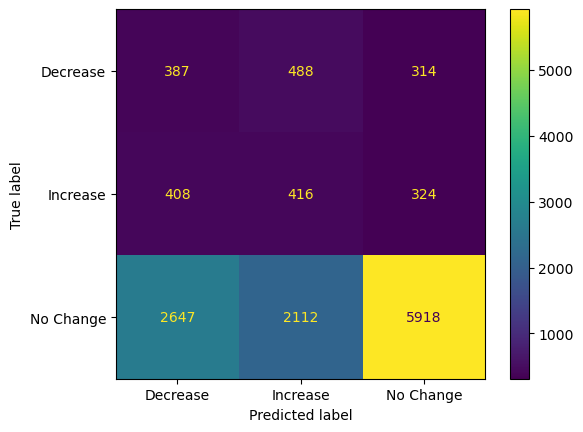

In [26]:
X_train_features = X_train[features1]
X_test_features = X_test[features1]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.11      0.34      0.16       986
    Increase       0.11      0.27      0.16       998
   No Change       0.88      0.50      0.64      8333

    accuracy                           0.46     10317
   macro avg       0.37      0.37      0.32     10317
weighted avg       0.73      0.46      0.55     10317



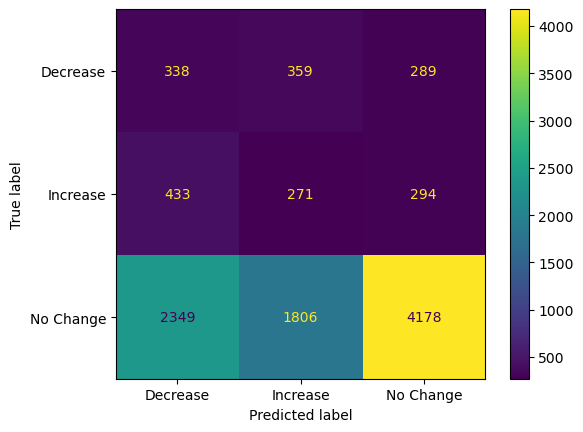

In [57]:
X_train_features = X_train[features2]
X_test_features = X_test[features2]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.08      0.14      0.10       986
    Increase       0.09      0.16      0.12       998
   No Change       0.80      0.67      0.73      8333

    accuracy                           0.57     10317
   macro avg       0.33      0.32      0.32     10317
weighted avg       0.66      0.57      0.61     10317



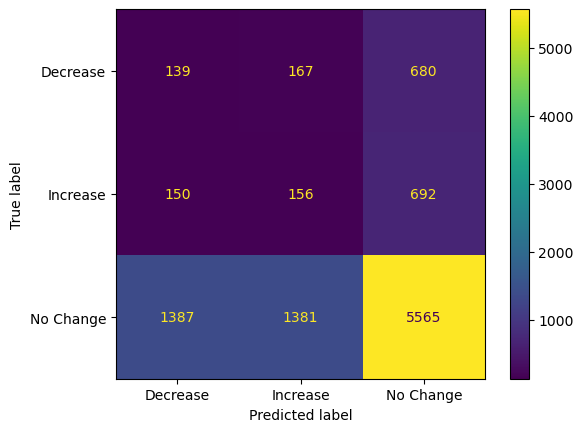

In [58]:
X_train_features = X_train[features3]
X_test_features = X_test[features3]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.15      0.04      0.06       986
    Increase       0.11      0.03      0.04       998
   No Change       0.81      0.96      0.88      8333

    accuracy                           0.78     10317
   macro avg       0.36      0.34      0.33     10317
weighted avg       0.68      0.78      0.72     10317



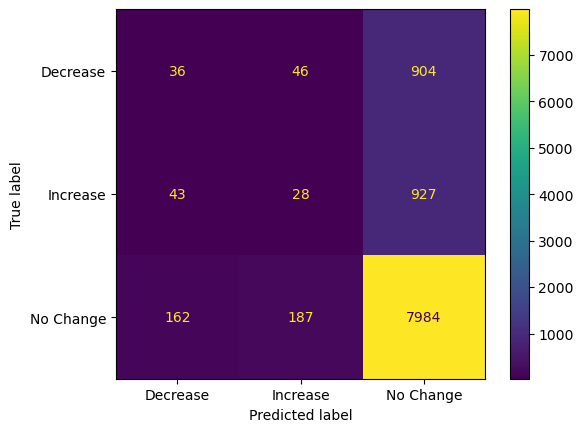

In [59]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

In [60]:
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

                                               Feature  Importance
63                                 day_of_week_Tuesday    0.031667
61                                  day_of_week_Monday    0.030871
64                               day_of_week_Wednesday    0.030871
62                                day_of_week_Thursday    0.029697
60                                  day_of_week_Friday    0.028804
39                                       what2_Leisure    0.025315
43                               what2_Study/workgroup    0.022597
47                                        withw2_Alone    0.020657
36                                        what2_Eating    0.018053
38                                       what2_Lecture    0.016563
45                           what2_Watching/TV/YouTube    0.016321
99                                       time_10:00:00    0.015029
101                                      time_11:00:00    0.014971
102                                      time_11:30:00    0.01

              precision    recall  f1-score   support

   No Change       0.90      0.53      0.66      8333
    Decrease       0.12      0.32      0.17       986
    Increase       0.13      0.35      0.19       998

    accuracy                           0.49     10317
   macro avg       0.38      0.40      0.34     10317
weighted avg       0.75      0.49      0.57     10317



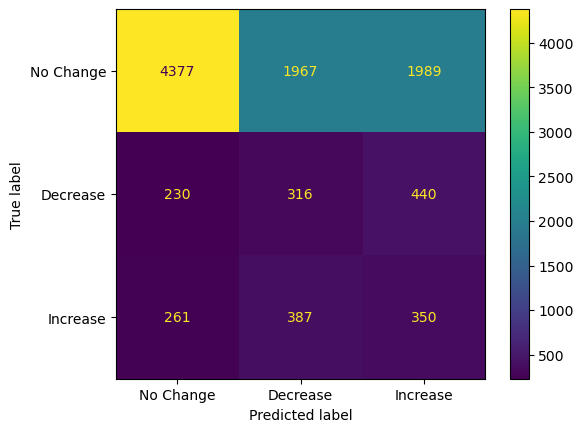

In [24]:
X_train_features = X_train[features1]
X_test_features = X_test[features1]

label_mapping = {'No Change': 0, 'Decrease': 1, 'Increase': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['No Change', 'Decrease', 'Increase']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['No Change', 'Decrease', 'Increase'])

              precision    recall  f1-score   support

   No Change       0.88      0.50      0.64      8333
    Decrease       0.11      0.33      0.16       986
    Increase       0.11      0.29      0.16       998

    accuracy                           0.46     10317
   macro avg       0.37      0.37      0.32     10317
weighted avg       0.73      0.46      0.55     10317



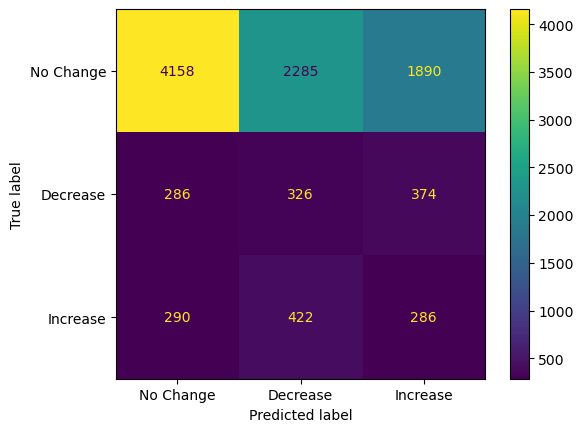

In [62]:
X_train_features = X_train[features2]
X_test_features = X_test[features2]

label_mapping = {'No Change': 0, 'Decrease': 1, 'Increase': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['No Change', 'Decrease', 'Increase']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['No Change', 'Decrease', 'Increase'])

              precision    recall  f1-score   support

   No Change       0.81      0.40      0.54      8333
    Decrease       0.09      0.26      0.13       986
    Increase       0.09      0.30      0.14       998

    accuracy                           0.38     10317
   macro avg       0.33      0.32      0.27     10317
weighted avg       0.67      0.38      0.46     10317



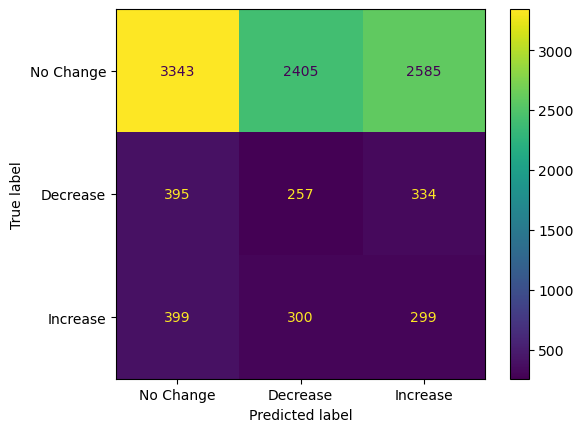

In [63]:
X_train_features = X_train[features3]
X_test_features = X_test[features3]

label_mapping = {'No Change': 0, 'Decrease': 1, 'Increase': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['No Change', 'Decrease', 'Increase']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['No Change', 'Decrease', 'Increase'])

              precision    recall  f1-score   support

   No Change       0.89      0.59      0.71     10677
    Decrease       0.12      0.30      0.17      1189
    Increase       0.12      0.31      0.18      1148

    accuracy                           0.54     13014
   macro avg       0.38      0.40      0.35     13014
weighted avg       0.75      0.54      0.61     13014



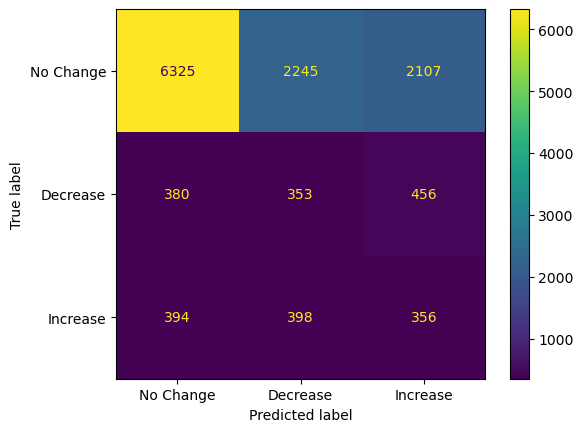

In [24]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

label_mapping = {'No Change': 0, 'Decrease': 1, 'Increase': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['No Change', 'Decrease', 'Increase']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['No Change', 'Decrease', 'Increase'])

In [65]:
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

                                               Feature  Importance
28                                           Bodykines    0.021760
18                                            Pconserv    0.018093
29                                             Musical    0.013130
11                                              Phedon    0.012786
6                                           Ptradition    0.012632
30                                       Interpersonal    0.012246
82                                           cohort_23    0.012036
22                                          Ppromotion    0.011996
8                                             Punivers    0.011767
16                                            Pselfenh    0.011755
14                                           Psecurity    0.011658
84                                        cohort_25-26    0.011634
32                                       Environmental    0.010968
20                                      Psuprapersonal    0.01

Ridge Logistic Regression:
              precision    recall  f1-score   support

    Decrease       0.10      0.32      0.16       986
    Increase       0.11      0.28      0.16       998
   No Change       0.87      0.49      0.63      8333

    accuracy                           0.46     10317
   macro avg       0.36      0.37      0.32     10317
weighted avg       0.72      0.46      0.54     10317



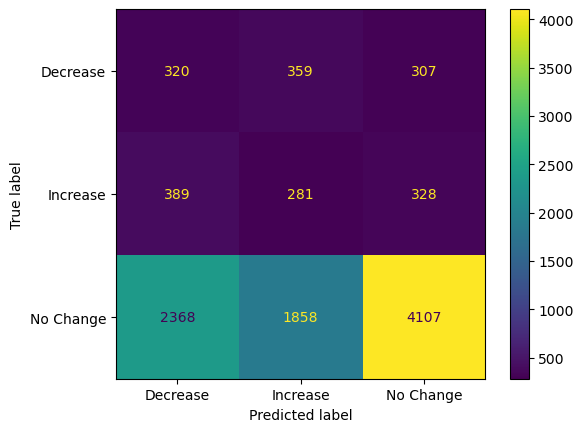

In [66]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features4])
X_test_scaled = scaler.transform(X_test[features4])

# Ridge Logistic Regression
ridge_model = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', max_iter=1000, class_weight='balanced')
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate Ridge
print("Ridge Logistic Regression:")
print(classification_report(y_test, y_pred_ridge))
ConfusionMatrixDisplay.from_estimator(ridge_model, X_test_scaled, y_test)

Lasso Logistic Regression:
              precision    recall  f1-score   support

    Decrease       0.12      0.02      0.04       986
    Increase       0.18      0.03      0.06       998
   No Change       0.81      0.97      0.88      8333

    accuracy                           0.79     10317
   macro avg       0.37      0.34      0.33     10317
weighted avg       0.69      0.79      0.72     10317



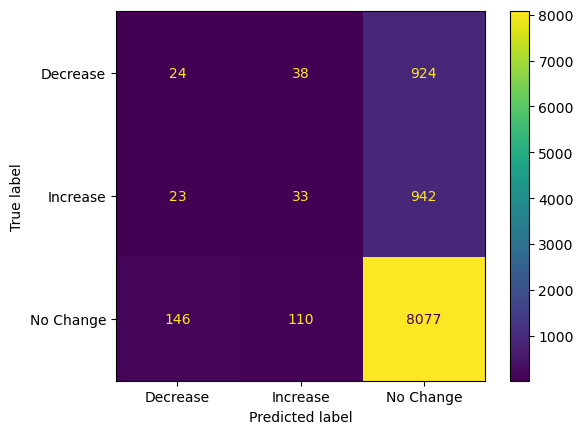

In [67]:
# Lasso Logistic Regression
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', max_iter=1000, class_weight='balanced')
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate Lasso
print("Lasso Logistic Regression:")
print(classification_report(y_test, y_pred_lasso))
ConfusionMatrixDisplay.from_estimator(lasso_model, X_test_scaled, y_test)

Logistic Regression with PCA:
              precision    recall  f1-score   support

    Decrease       0.10      0.33      0.16       986
    Increase       0.12      0.31      0.17       998
   No Change       0.86      0.48      0.62      8333

    accuracy                           0.45     10317
   macro avg       0.36      0.37      0.31     10317
weighted avg       0.72      0.45      0.53     10317



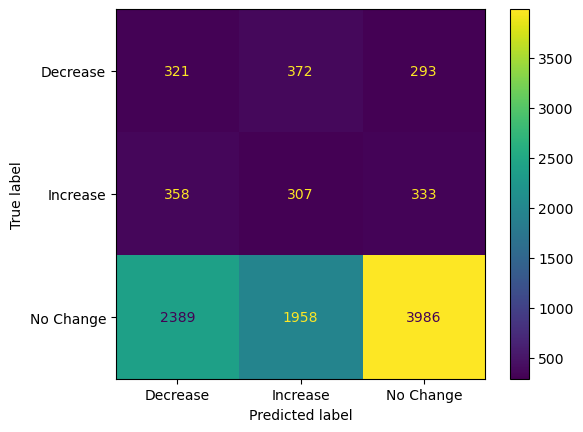

In [68]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Logistic Regression on PCA-transformed data
pca_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
pca_model.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = pca_model.predict(X_test_pca)

# Evaluate PCA Model
print("Logistic Regression with PCA:")
print(classification_report(y_test, y_pred_pca))
ConfusionMatrixDisplay.from_estimator(pca_model, X_test_pca, y_test)

In [69]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {num_components}")

Number of components explaining 95% variance: 94


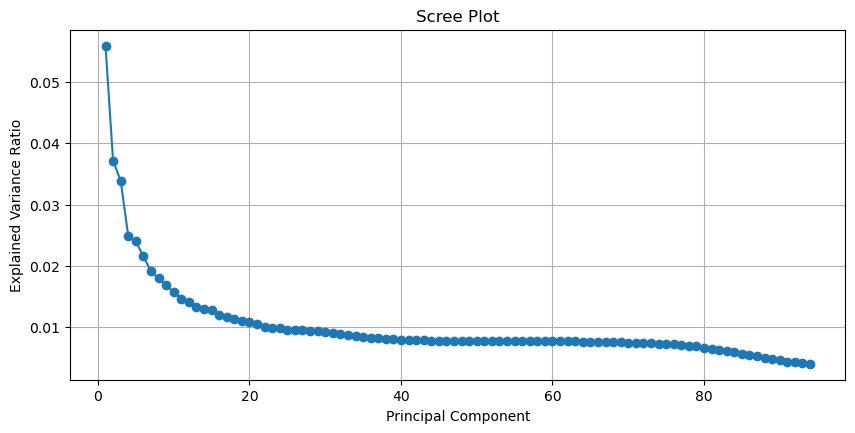

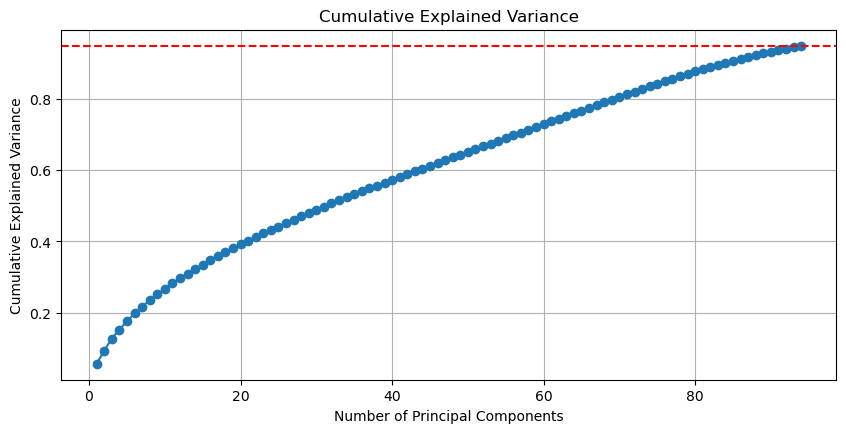

In [70]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(2,1,2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [25]:
# Define the feature matrix (X) and the target variable (y)
X = df_holiday.drop(columns=['mood_change'])
y = df_holiday['mood_change']

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create modified versions of the training and test sets for linear regression
X_train_linear = X_train.copy()
X_test_linear = X_test.copy()

variables_to_remove = [
    'what2_Cooking', 'withw2_Alone', 'where2_HomeApartment/room', 'day_type_Holiday', 
    'day_of_week_Saturday', 'gender_Female', 'nationality_Italian', 
    'department_Business/economics', 'cohort_17-18', 'degree_BSc', 
    'residence_Trento', 'time_07:00:00'
]

# Remove the specified variables from X_train_linear
X_train_linear = X_train_linear.drop(columns=variables_to_remove, errors='ignore')
X_test_linear = X_test_linear.drop(columns=variables_to_remove, errors='ignore')

In [26]:
features1 = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Pconformity', 'Ptradition', 'Pbenov', 'Punivers', 'Pself', 'Pstim',
       'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen', 'Pselfenh',
       'Pselftran', 'Pconserv', 'Pexcitements', 'Psuprapersonal',
       'Pinteractive', 'Ppromotion', 'Pexistence', 'Pnormative', 'Linguistic',
       'Logicmath', 'Spatial', 'Bodykines', 'Musical', 'Interpersonal',
       'Intrapersonal', 'Environmental', 'Spiritual']

features2 = ['gender_Female', 'gender_Male', 'nationality_Italian', 'nationality_Foreign', 'department_Business/economics', 
            'department_Engineering and Applied Sciences', 'department_Humanities', 'department_International Relations and Public Administration', 
            'department_Law', 'department_Medicine and veterinary medicine', 'department_Natural Sciences', 'department_Social Sciences', 
            'cohort_17-18', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22', 'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27-30', 
            'cohort_31+', 'degree_BSc', 'degree_MSc', 'residence_Close to the city where the university is located (less than 1.30 hours of travel).', 
            'residence_In another city away from where the university is located (more than 1.30 hours of travel)', 'residence_Rovereto', 
            'residence_Trento']

features2_linear = ['gender_Male', 'nationality_Foreign', 
       'department_Engineering and Applied Sciences', 'department_Humanities', 
       'department_Law', 'department_Medicine and veterinary medicine', 
       'department_Natural Sciences', 'department_Social Sciences', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22', 'cohort_23', 
       'cohort_24', 'cohort_25-26', 'cohort_27-30', 'cohort_31+', 'degree_MSc', 
       'residence_Close to the city where the university is located (less than 1.30 hours of travel).', 
       'residence_In another city away from where the university is located (more than 1.30 hours of travel)', 'residence_Rovereto']

features3 = ['what2_Cooking', 'what2_DistantCommunication/SeekingInternet', 'what2_Eating', 'what2_Householdcare/Shopping', 'what2_Lecture', 
            'what2_Leisure', 'what2_Listeningmusic/Reading', 'what2_Social media', 'what2_Sociallife/Happy Hour', 'what2_Study/workgroup', 
            'what2_Travel', 'what2_Watching/TV/YouTube', 'what2_Work/Other', 'withw2_Alone', 'withw2_Classmates', 'withw2_Colleagues/Other', 
            'withw2_Friends', 'withw2_Partner', 'withw2_Relatives', 'withw2_Roommates', 'where2_AnotherIndoor', 
            'where2_AnotherOutdoor', 'where2_Classroom/Uni_Library', 'where2_HomeApartment/room', 'where2_House/friends/others', 
            'where2_RelativesHome', 'day_of_week_Saturday', 'day_of_week_Sunday',
            'time_07:00:00', 'time_07:30:00', 'time_08:00:00', 'time_08:30:00', 'time_09:00:00', 'time_09:30:00', 'time_10:00:00', 
            'time_10:30:00', 'time_11:00:00', 'time_11:30:00', 'time_12:00:00', 'time_12:30:00', 'time_13:00:00', 'time_13:30:00', 
            'time_14:00:00', 'time_14:30:00', 'time_15:00:00', 'time_15:30:00', 'time_16:00:00', 'time_16:30:00', 'time_17:00:00', 
            'time_17:30:00', 'time_18:00:00', 'time_18:30:00', 'time_19:00:00', 'time_19:30:00', 'time_20:00:00', 'time_20:30:00', 
            'time_21:00:00', 'time_21:30:00', 'time_22:00:00', 'time_22:30:00', 'time_23:00:00', 'time_23:30:00', 'time_00:00:00', 
            'time_00:30:00', 'time_01:00:00', 'time_01:30:00', 'time_02:00:00']

features3_linear = ['what2_DistantCommunication/SeekingInternet', 'what2_Eating', 'what2_Householdcare/Shopping', 'what2_Lecture', 'what2_Leisure', 
            'what2_Listeningmusic/Reading', 'what2_Social media', 'what2_Sociallife/Happy Hour', 'what2_Study/workgroup', 'what2_Travel', 
            'what2_Watching/TV/YouTube', 'what2_Work/Other', 'withw2_Classmates', 'withw2_Colleagues/Other', 'withw2_Friends', 'withw2_Partner',
            'withw2_Relatives', 'withw2_Roommates', 'where2_AnotherIndoor', 'where2_AnotherOutdoor', 
            'where2_Classroom/Uni_Library', 'where2_House/friends/others', 'where2_RelativesHome', 'day_of_week_Sunday',
            'time_07:30:00', 'time_08:00:00', 'time_08:30:00', 'time_09:00:00', 'time_09:30:00', 'time_10:00:00', 'time_10:30:00', 
            'time_11:00:00', 'time_11:30:00', 'time_12:00:00', 'time_12:30:00', 'time_13:00:00', 'time_13:30:00', 'time_14:00:00', 
            'time_14:30:00', 'time_15:00:00', 'time_15:30:00', 'time_16:00:00', 'time_16:30:00', 'time_17:00:00', 'time_17:30:00', 
            'time_18:00:00', 'time_18:30:00', 'time_19:00:00', 'time_19:30:00', 'time_20:00:00', 'time_20:30:00', 'time_21:00:00', 
            'time_21:30:00', 'time_22:00:00', 'time_22:30:00', 'time_23:00:00', 'time_23:30:00', 'time_00:00:00', 'time_00:30:00', 
            'time_01:00:00', 'time_01:30:00', 'time_02:00:00']

features4 = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness', 'Pconformity', 'Ptradition', 'Pbenov', 
            'Punivers', 'Pself', 'Pstim', 'Phedon', 'Pachieve', 'Ppower', 'Psecurity', 'Popen', 'Pselfenh', 'Pselftran', 'Pconserv', 
            'Pexcitements', 'Psuprapersonal', 'Pinteractive', 'Ppromotion', 'Pexistence', 'Pnormative', 'Linguistic', 'Logicmath', 'Spatial', 
            'Bodykines', 'Musical', 'Interpersonal', 'Intrapersonal', 'Environmental', 'Spiritual',
            'what2_Cooking', 'what2_DistantCommunication/SeekingInternet', 'what2_Eating', 'what2_Householdcare/Shopping', 'what2_Lecture', 
            'what2_Leisure', 'what2_Listeningmusic/Reading', 'what2_Social media', 'what2_Sociallife/Happy Hour', 'what2_Study/workgroup', 
            'what2_Travel', 'what2_Watching/TV/YouTube', 'what2_Work/Other', 'withw2_Alone', 'withw2_Classmates', 'withw2_Colleagues/Other', 
            'withw2_Friends', 'withw2_Partner', 'withw2_Relatives', 'withw2_Roommates', 'where2_AnotherIndoor', 
            'where2_AnotherOutdoor', 'where2_Classroom/Uni_Library', 'where2_HomeApartment/room', 'where2_House/friends/others', 
            'where2_RelativesHome', 'day_of_week_Saturday', 'day_of_week_Sunday',
            'gender_Female', 'gender_Male', 'nationality_Italian', 'nationality_Foreign', 'department_Business/economics', 
            'department_Engineering and Applied Sciences', 'department_Humanities', 'department_International Relations and Public Administration', 
            'department_Law', 'department_Medicine and veterinary medicine', 'department_Natural Sciences', 'department_Social Sciences', 
            'cohort_17-18', 'cohort_19', 'cohort_20', 'cohort_21', 'cohort_22', 'cohort_23', 'cohort_24', 'cohort_25-26', 'cohort_27-30', 
            'cohort_31+', 'degree_BSc', 'degree_MSc', 'residence_Close to the city where the university is located (less than 1.30 hours of travel).', 
            'residence_In another city away from where the university is located (more than 1.30 hours of travel)', 'residence_Rovereto', 'residence_Trento',
            'time_07:00:00', 'time_07:30:00', 'time_08:00:00', 'time_08:30:00', 'time_09:00:00', 'time_09:30:00', 'time_10:00:00', 
            'time_10:30:00', 'time_11:00:00', 'time_11:30:00', 'time_12:00:00', 'time_12:30:00', 'time_13:00:00', 'time_13:30:00', 
            'time_14:00:00', 'time_14:30:00', 'time_15:00:00', 'time_15:30:00', 'time_16:00:00', 'time_16:30:00', 'time_17:00:00', 
            'time_17:30:00', 'time_18:00:00', 'time_18:30:00', 'time_19:00:00', 'time_19:30:00', 'time_20:00:00', 'time_20:30:00', 
            'time_21:00:00', 'time_21:30:00', 'time_22:00:00', 'time_22:30:00', 'time_23:00:00', 'time_23:30:00', 'time_00:00:00', 
            'time_00:30:00', 'time_01:00:00', 'time_01:30:00', 'time_02:00:00']

c:\Users\39348\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    Decrease       0.14      0.32      0.20       601
    Increase       0.12      0.36      0.18       572
   No Change       0.88      0.52      0.65      4654

    accuracy                           0.48      5827
   macro avg       0.38      0.40      0.34      5827
weighted avg       0.73      0.48      0.56      5827



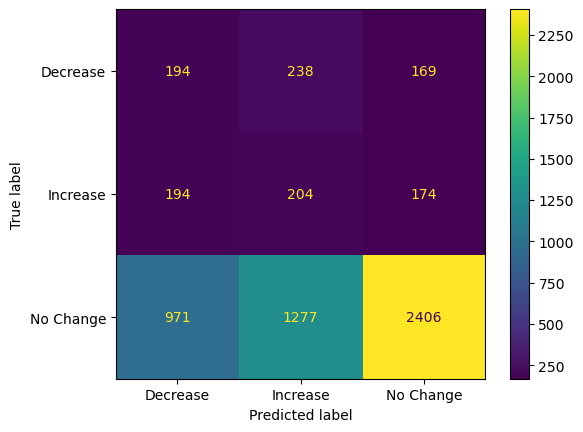

In [27]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features1]
X_test_features = X_test_linear[features1]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.10      0.24      0.14       601
    Increase       0.12      0.32      0.18       572
   No Change       0.84      0.51      0.64      4654

    accuracy                           0.47      5827
   macro avg       0.35      0.36      0.32      5827
weighted avg       0.69      0.47      0.54      5827



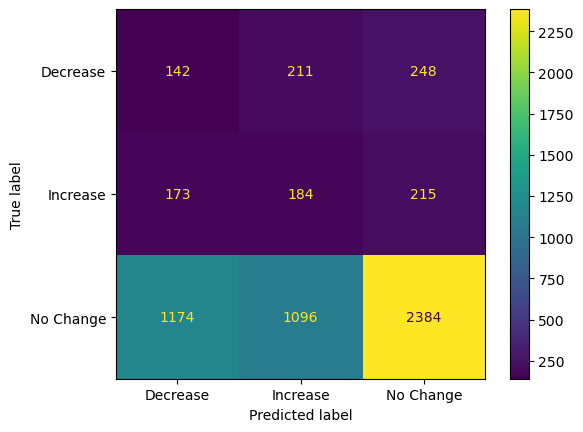

In [74]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features2_linear]
X_test_features = X_test_linear[features2_linear]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

c:\Users\39348\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    Decrease       0.10      0.32      0.16       601
    Increase       0.10      0.39      0.15       572
   No Change       0.82      0.29      0.43      4654

    accuracy                           0.30      5827
   macro avg       0.34      0.33      0.25      5827
weighted avg       0.67      0.30      0.37      5827



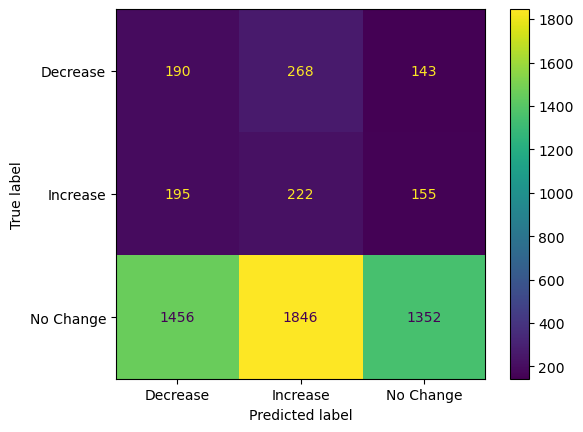

In [75]:
# Ensure that day_type and day_of_week are properly one-hot encoded
X_train_features = X_train_linear[features3_linear]
X_test_features = X_test_linear[features3_linear]

# Add a constant to the training and test sets for the intercept term
X_train_features = sm.add_constant(X_train_features)
X_test_features = sm.add_constant(X_test_features)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.14      0.37      0.20       601
    Increase       0.12      0.34      0.18       572
   No Change       0.89      0.49      0.64      4654

    accuracy                           0.47      5827
   macro avg       0.38      0.40      0.34      5827
weighted avg       0.74      0.47      0.55      5827



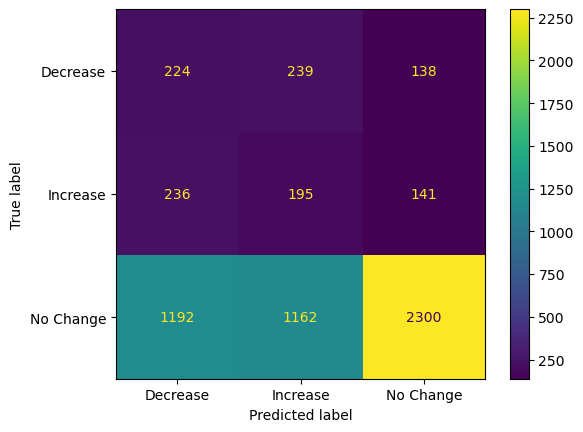

In [28]:
X_train_features = X_train[features1]
X_test_features = X_test[features1]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.11      0.33      0.17       601
    Increase       0.13      0.35      0.19       572
   No Change       0.89      0.48      0.62      4654

    accuracy                           0.45      5827
   macro avg       0.38      0.39      0.33      5827
weighted avg       0.73      0.45      0.53      5827



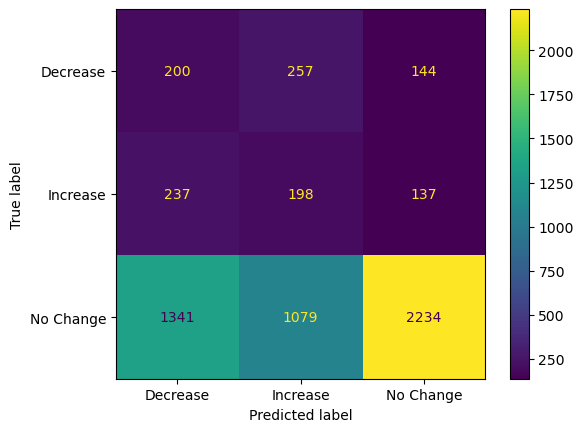

In [77]:
X_train_features = X_train[features2]
X_test_features = X_test[features2]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.10      0.17      0.13       601
    Increase       0.10      0.19      0.13       572
   No Change       0.80      0.63      0.70      4654

    accuracy                           0.54      5827
   macro avg       0.33      0.33      0.32      5827
weighted avg       0.66      0.54      0.59      5827



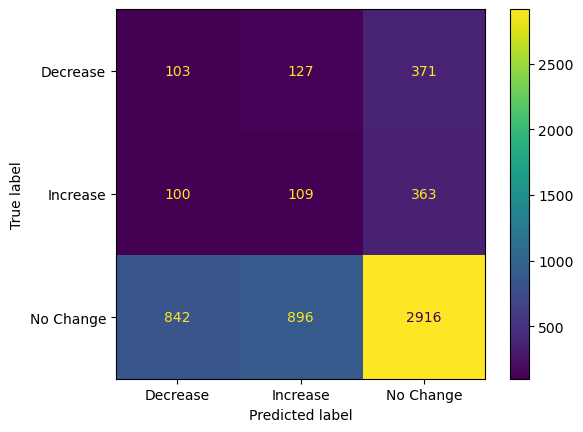

In [78]:
X_train_features = X_train[features3]
X_test_features = X_test[features3]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

              precision    recall  f1-score   support

    Decrease       0.14      0.04      0.06       601
    Increase       0.16      0.05      0.08       572
   No Change       0.81      0.95      0.87      4654

    accuracy                           0.77      5827
   macro avg       0.37      0.35      0.34      5827
weighted avg       0.68      0.77      0.71      5827



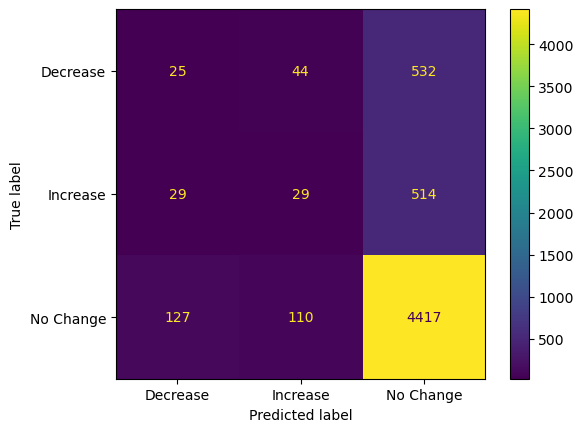

In [79]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_features, y_train)
y_pred = model.predict(X_test_features)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test)

In [80]:
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

                                               Feature  Importance
61                                  day_of_week_Sunday    0.034617
60                                day_of_week_Saturday    0.033421
39                                       what2_Leisure    0.029102
43                               what2_Study/workgroup    0.022739
47                                        withw2_Alone    0.021779
45                           what2_Watching/TV/YouTube    0.020977
36                                        what2_Eating    0.019828
112                                      time_18:00:00    0.017221
113                                      time_18:30:00    0.016809
104                                      time_14:00:00    0.016135
119                                      time_21:30:00    0.016033
52                                    withw2_Relatives    0.015950
107                                      time_15:30:00    0.015811
108                                      time_16:00:00    0.01

              precision    recall  f1-score   support

   No Change       0.89      0.49      0.64      4654
    Decrease       0.14      0.41      0.20       601
    Increase       0.12      0.31      0.18       572

    accuracy                           0.47      5827
   macro avg       0.38      0.40      0.34      5827
weighted avg       0.74      0.47      0.55      5827



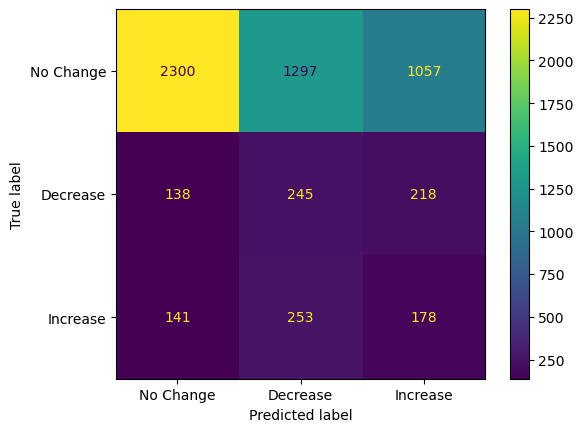

In [29]:
X_train_features = X_train[features1]
X_test_features = X_test[features1]

label_mapping = {'No Change': 0, 'Decrease': 1, 'Increase': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['No Change', 'Decrease', 'Increase']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['No Change', 'Decrease', 'Increase'])

              precision    recall  f1-score   support

   No Change       0.89      0.47      0.62      4654
    Decrease       0.11      0.34      0.17       601
    Increase       0.12      0.32      0.17       572

    accuracy                           0.44      5827
   macro avg       0.37      0.38      0.32      5827
weighted avg       0.73      0.44      0.53      5827



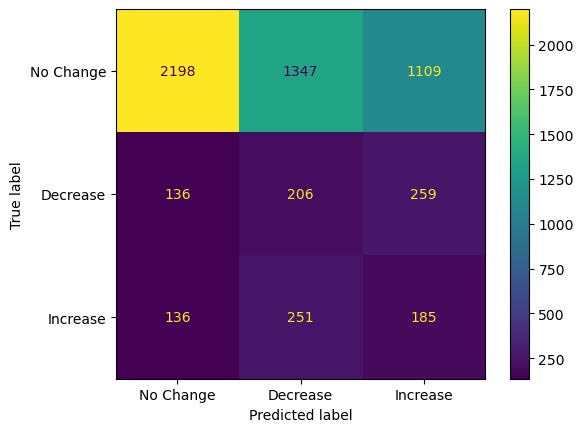

In [82]:
X_train_features = X_train[features2]
X_test_features = X_test[features2]

label_mapping = {'No Change': 0, 'Decrease': 1, 'Increase': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['No Change', 'Decrease', 'Increase']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['No Change', 'Decrease', 'Increase'])

              precision    recall  f1-score   support

   No Change       0.81      0.40      0.53      4654
    Decrease       0.10      0.29      0.15       601
    Increase       0.09      0.28      0.14       572

    accuracy                           0.38      5827
   macro avg       0.33      0.32      0.27      5827
weighted avg       0.66      0.38      0.46      5827



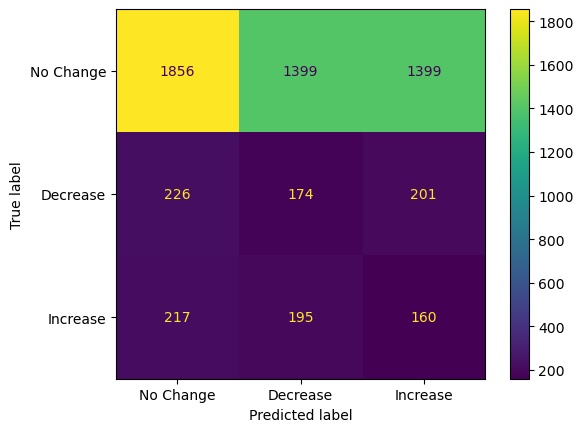

In [83]:
X_train_features = X_train[features3]
X_test_features = X_test[features3]

label_mapping = {'No Change': 0, 'Decrease': 1, 'Increase': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['No Change', 'Decrease', 'Increase']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['No Change', 'Decrease', 'Increase'])

              precision    recall  f1-score   support

   No Change       0.85      0.66      0.74      4654
    Decrease       0.13      0.23      0.17       601
    Increase       0.13      0.27      0.18       572

    accuracy                           0.58      5827
   macro avg       0.37      0.39      0.36      5827
weighted avg       0.71      0.58      0.63      5827



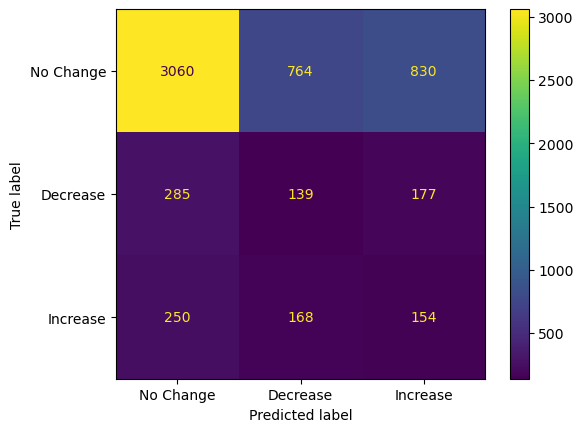

In [84]:
X_train_features = X_train[features4]
X_test_features = X_test[features4]

label_mapping = {'No Change': 0, 'Decrease': 1, 'Increase': 2}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

class_counts = y_train_encoded.value_counts().to_dict()
total_samples = len(y_train_encoded)
class_weights = {k: total_samples / v for k, v in class_counts.items()}

# Pass the weights to the XGBoost model
model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

# Adjust weights for imbalance
sample_weights = y_train_encoded.map(class_weights).values

# Train the model with weights
model.fit(X_train_features, y_train_encoded, sample_weight=sample_weights)

# Predict on the test set
y_pred_encoded = model.predict(X_test_features)

# Evaluate the model
print(classification_report(y_test_encoded, y_pred_encoded, target_names=['No Change', 'Decrease', 'Increase']))
ConfusionMatrixDisplay.from_estimator(model, X_test_features, y_test_encoded, display_labels=['No Change', 'Decrease', 'Increase'])

In [85]:
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train_features.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance score
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(importance_df)

                                               Feature  Importance
13                                              Ppower    0.020790
21                                        Pinteractive    0.017961
19                                        Pexcitements    0.014341
33                                           Spiritual    0.013813
20                                      Psuprapersonal    0.012878
11                                              Phedon    0.012552
29                                             Musical    0.012233
84                                          degree_BSc    0.011964
23                                          Pexistence    0.011745
2                                    Conscientiousness    0.011744
24                                          Pnormative    0.011478
15                                               Popen    0.011217
12                                            Pachieve    0.011102
78                                           cohort_22    0.01

Ridge Logistic Regression:
              precision    recall  f1-score   support

    Decrease       0.12      0.30      0.18       601
    Increase       0.12      0.35      0.18       572
   No Change       0.89      0.52      0.66      4654

    accuracy                           0.48      5827
   macro avg       0.38      0.39      0.34      5827
weighted avg       0.73      0.48      0.56      5827



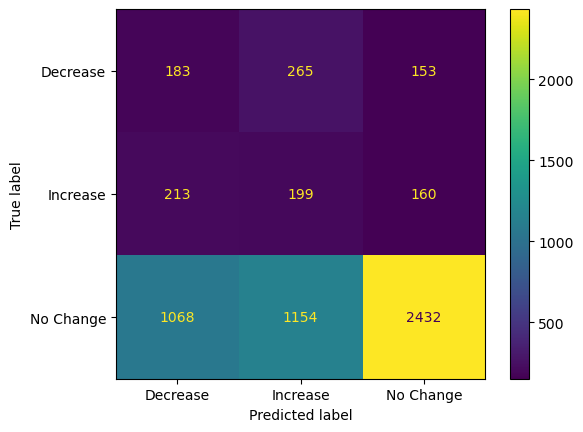

In [86]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features4])
X_test_scaled = scaler.transform(X_test[features4])

# Ridge Logistic Regression
ridge_model = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', max_iter=1000, class_weight='balanced')
ridge_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate Ridge
print("Ridge Logistic Regression:")
print(classification_report(y_test, y_pred_ridge))
ConfusionMatrixDisplay.from_estimator(ridge_model, X_test_scaled, y_test)

Lasso Logistic Regression:
              precision    recall  f1-score   support

    Decrease       0.14      0.05      0.08       601
    Increase       0.16      0.08      0.11       572
   No Change       0.81      0.93      0.87      4654

    accuracy                           0.75      5827
   macro avg       0.37      0.35      0.35      5827
weighted avg       0.68      0.75      0.71      5827



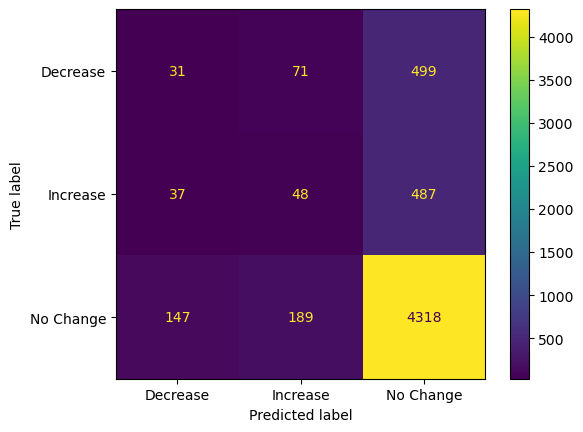

In [87]:
# Lasso Logistic Regression
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='ovr', max_iter=1000, class_weight='balanced')
lasso_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate Lasso
print("Lasso Logistic Regression:")
print(classification_report(y_test, y_pred_lasso))
ConfusionMatrixDisplay.from_estimator(lasso_model, X_test_scaled, y_test)

Logistic Regression with PCA:
              precision    recall  f1-score   support

    Decrease       0.11      0.31      0.17       601
    Increase       0.11      0.34      0.17       572
   No Change       0.86      0.44      0.58      4654

    accuracy                           0.41      5827
   macro avg       0.36      0.36      0.30      5827
weighted avg       0.71      0.41      0.50      5827



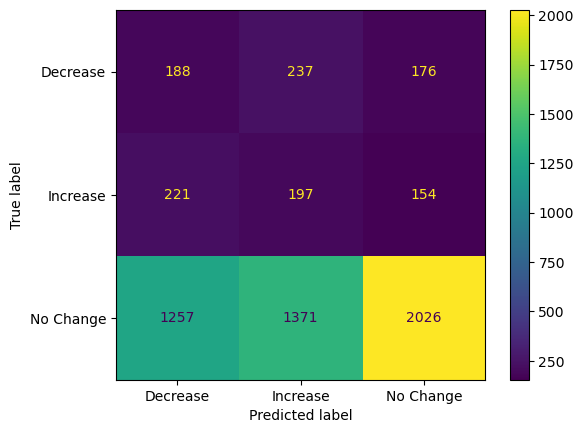

In [88]:
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Logistic Regression on PCA-transformed data
pca_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
pca_model.fit(X_train_pca, y_train)

# Predictions
y_pred_pca = pca_model.predict(X_test_pca)

# Evaluate PCA Model
print("Logistic Regression with PCA:")
print(classification_report(y_test, y_pred_pca))
ConfusionMatrixDisplay.from_estimator(pca_model, X_test_pca, y_test)

In [89]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {num_components}")

Number of components explaining 95% variance: 90


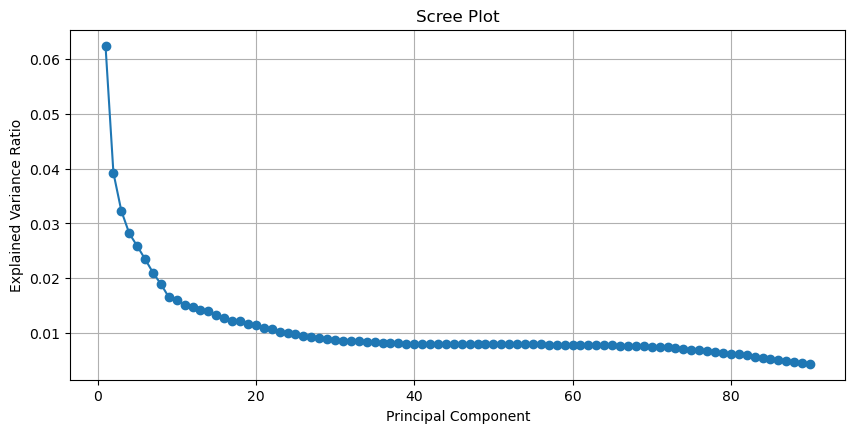

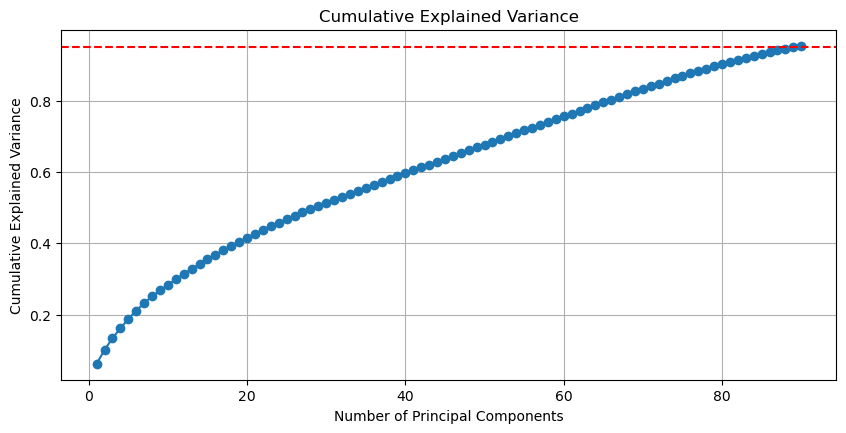

In [90]:
plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(2,1,2)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()

In [ ]:
# Get the coefficients for each class
coefficients = model.coef_

# Get the intercepts for each class
intercepts = model.intercept_

# Create a DataFrame to display coefficients for each class
coef_df = pd.DataFrame(coefficients, columns=X_train_features.columns)
coef_df['Intercept'] = intercepts

# Add class names as rows (optional, if y_train is encoded)
coef_df['Class'] = model.classes_

# Rearrange columns to place 'Class' first
coef_df = coef_df[['Class'] + [col for col in coef_df.columns if col != 'Class']]

# Display the coefficients
coef_df

In [10]:
pd.set_option('display.max_rows', None)

In [ ]:
pd.set_option('display.max_rows')